# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

from statsmodels.tools.sm_exceptions import HessianInversionWarning

warnings.simplefilter("ignore", HessianInversionWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv("INNHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [4]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


<IPython.core.display.Javascript object>

In [5]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [6]:
df.shape

(36275, 19)

<IPython.core.display.Javascript object>

* The dataset has 36275 rows and 19 columns 

In [7]:
# checking for duplicate values in the data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no duplicates in the dataset

### Check the data types of the columns for the dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

* The dependent variable is the booking_status which is of categorical type.
* Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, and booking_status are of categorical type the while other variables are of integer type.
* There are no missing values in the dataset.
* The memory usage is 5.3+ MB

In [9]:
# Converting "objects" to "category" reduces the data space required to store the dataframe (except Booking_ID as it will be dropped)
df.type_of_meal_plan = df.type_of_meal_plan.astype("category")
df.room_type_reserved = df.room_type_reserved.astype("category")
df.market_segment_type = df.market_segment_type.astype("category")
df.booking_status = df.booking_status.astype("category")

<IPython.core.display.Javascript object>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  object  
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

<IPython.core.display.Javascript object>

* 4 of the object types are now categorical types.
* The memory usage is reduced from 5.3+ to 4.3+ MB

### Summary of the dataset.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


<IPython.core.display.Javascript object>

* `no_of_adults`: The median number of adults per booking is 2 and the maximum is 4, the minimum is 0 - perhaps this indicates a room with children next door to parents. 
* `no_of_children`: The average number of children per booking is 0, the median is also 0 and the maximum is 10. 
* `no_of_weekend_nights`: The range is from 0-7 weekend nights with an mean of 0.81 nights and a median of 1 night. 
* `no_of_week_nights`: The range is from 0-17 week nights with an mean of 2.20 nights and a median of 2 nights. 
* `lead_time`: The average lead time is about 3 months (85.2 days), the mean is about 2 months (57 days), and the max is over a year (443 days).
* `avg_price_per_room`: The average price per room is 103 euros, the minimum is free and the maximum is 540 euros.
* `no_of_special_requests`: The mean is no special requests, and the maximum number of special requests is 5.
* `no_of_previous_bookings_not_canceled`: The minimum and the median is zero, the maximum is 58.
* `required_car_parking_space`: The minimum and meadian is zero, the maximum is 1.
* `arrival_date`: It appears that there is an even spread of arrival dates ranging from the 1st day to the last day of the month, the mean is close to the 16th and the median is the 16th.
* `arrival_month`: The arrival month ranges from January through December, it appears that there are more arrivals in the second half of the year with a mean in July and a median of August.
* `arrival_year`: There are two possible arrival years 2017 and 2018, the 25th percentile and up is 2018.
* `repeated_guest`: This is a boolean 1 or 0. The value through the 75th percentile is not repeated - 0, with a max of 1.

In [12]:
# Making a list of all categorical variables (other than booking ID)
cat_col = [
    "type_of_meal_plan",
    "room_type_reserved",
    "market_segment_type",
    "booking_status",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 40)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
----------------------------------------
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
----------------------------------------
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
----------------------------------------
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
----------------------------------------


<IPython.core.display.Javascript object>

In [13]:
# filtering object type columns
df.describe(include=["object"])

,Booking_ID
count,36275
unique,36275
top,INN00001
freq,1


<IPython.core.display.Javascript object>

### Observations:
* `type_of_meal_plan`: There are 4 unique types, Meal Plan 1 (breakfast only) is the most common with 27835 occurences. 5130 bookings have meal type Not Selected.
* `room_type_reserved`: There are 7 types, Room_Type 1 is the most commonly reserved room type with 28130 occurences.
* `market_segment_type`: There are 5 types: Online, Offline, Corporate, Complimentary, and Aviation. Online is the most common with 23214 occurences.
* `booking_status`: There are 2 booking status types, about 2/3 of the total values are Not_Canceled.
* `Booking_ID`: Each Booking_ID value is unique.

### Check for missing values

In [14]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values in the dataset.

## Exploratory Data Analysis (EDA)

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate Analysis

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, hue=None, perc=False, n=None, r=90):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
    plt.xticks(rotation=r, fontsize=15)
    if hue is None:
        ax = sns.countplot(
            data=data,
            x=feature,
            palette="Paired",
            order=data[feature].value_counts().index,
        )
    else:
        ax = sns.countplot(
            data=data,
            x=feature,
            hue=hue,
            palette="Paired",
            order=data[feature].value_counts().index,
        )
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))  # legend placement
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [16]:
def histogram_boxplot(
    data, feature, figsize=(12, 7), kde=False, binrange=None, binwidth=None
):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data,
        x=feature,
        kde=kde,
        ax=ax_hist2,
        binrange=binrange,
        binwidth=binwidth,
        palette="winter",
    ) if binrange else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observations on number of adults

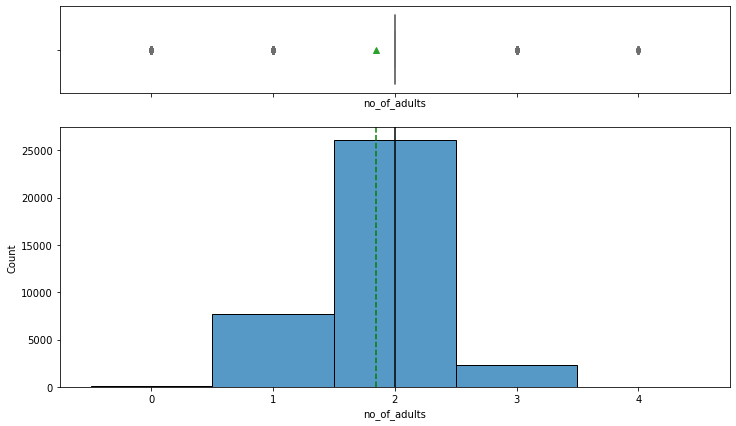

<IPython.core.display.Javascript object>

In [17]:
# binrange is chosen so that bins will be centered at 0,1,2,3,4.
histogram_boxplot(df, "no_of_adults", binrange=[-0.5, 4.5], binwidth=1)

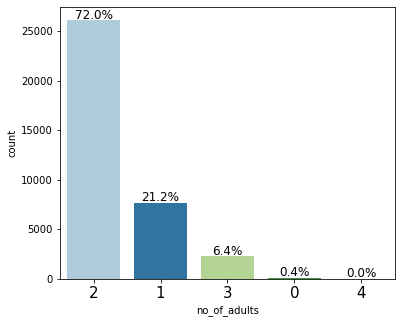

<IPython.core.display.Javascript object>

In [18]:
labeled_barplot(df, "no_of_adults", perc=True, r=0)

In [19]:
df["no_of_adults"].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

<IPython.core.display.Javascript object>

* The median number of adults is 2.
* The number of adults ranges from 0 to 4.
* 72% of the room bookings have 2 adults.

### Observations on number of children

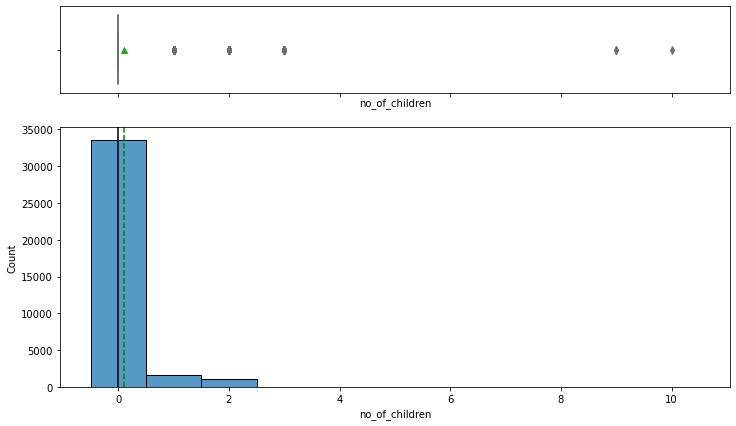

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "no_of_children", binrange=[-0.5, 10.5], binwidth=1)

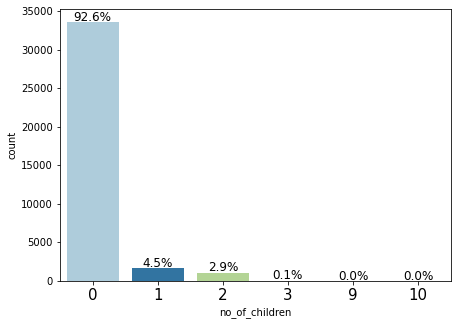

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(df, "no_of_children", perc=True, r=0)

* The median number of children is 0.
* 92.6% of room bookings have 0 children.
* The number of children ranges from 0 to 10.
* There are extreme outliers with values of 9 and 10 children.

### Observations on number of weekend nights

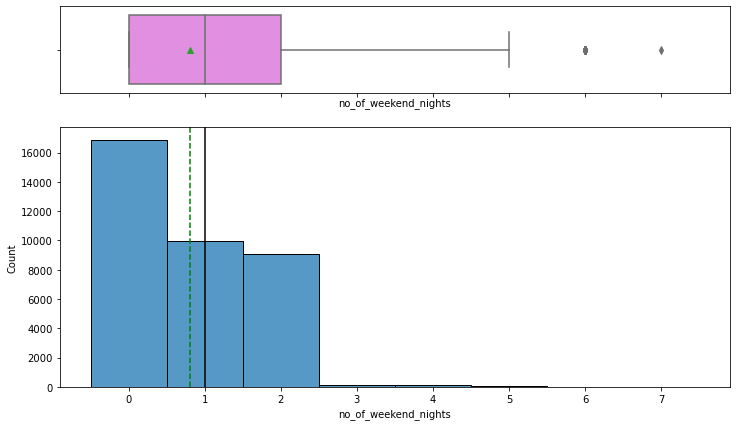

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, "no_of_weekend_nights", binrange=[-0.5, 7.5], binwidth=1)

* The median number of weekend nights is 1 night.
* The mode is 0 weekend nights.
* The number of weekend nights ranges from 0 to 7 weekend nights.

### Observations on number of week nights

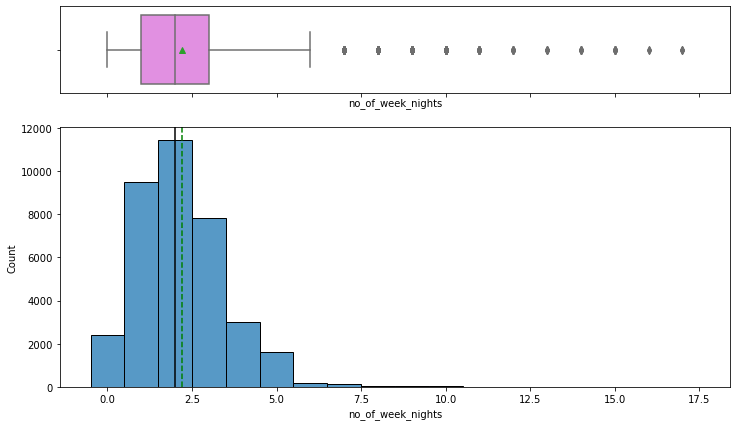

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "no_of_week_nights", binrange=[-0.5, 17.5], binwidth=1)

* The median number of week nights is 2 nights.
* There are several outliers on the high end of the distribution.
* The distribution is right skewed.

### Observations on type of meal plan

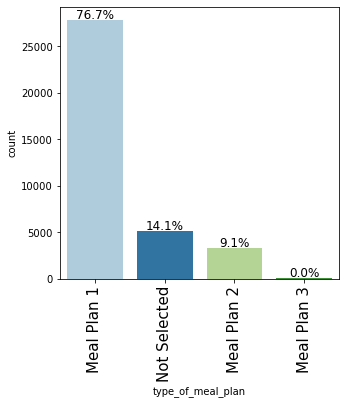

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(df, "type_of_meal_plan", perc=True)

In [25]:
plan3 = df[df["type_of_meal_plan"] == "Meal Plan 3"]
plan3.shape

(5, 19)

<IPython.core.display.Javascript object>

* Meal Plan 1 is the most popular meal plan type with 76.7% of the values.
* 14.1% is Not Selected, followed by 9.1% Meal Plan 2.
* There are only 5 total bookings in which Meal Plan 3 was chosen.

### Observations on required car parking space

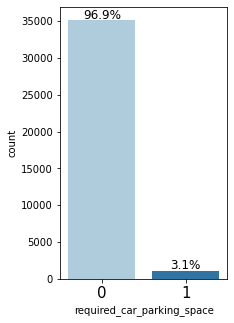

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(df, "required_car_parking_space", perc=True, r=0)

* 96.9% of bookings don't require a parking space.
* 3.1% of bookings require a single parking space.
* No bookings require more than one parking space.

### Observations on room type reserved

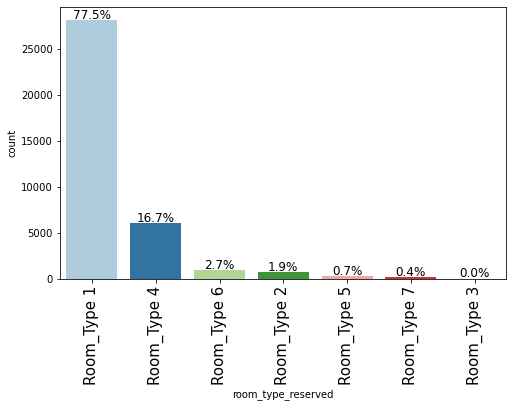

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(df, "room_type_reserved", perc=True)

#### Observations:
* 77.5% of the room_type_reserved is Room_Type1, followed by Room_type 4 with 16.7%, and Room_type 6 with 2.7%.

### Observations on lead time

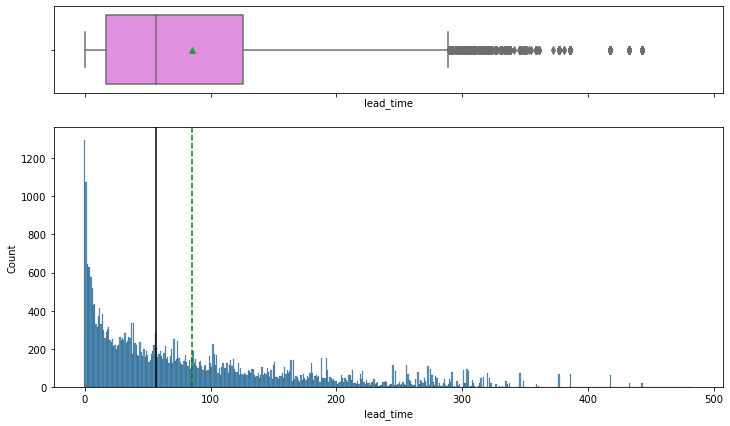

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(df, "lead_time", binrange=[-0.5, 483.5], binwidth=1)

In [29]:
print(
    f"The mean lead time is {round(df.lead_time.mean(),1)} days and the median lead time is {round(df.lead_time.median(),1)} days."
)

The mean lead time is 85.2 days and the median lead time is 57.0 days.


<IPython.core.display.Javascript object>

* The lead time distribution is right skewed.
* There are several outliers on the right side of the distribution.
* The mode is 0 days.

### Observations on arrival year

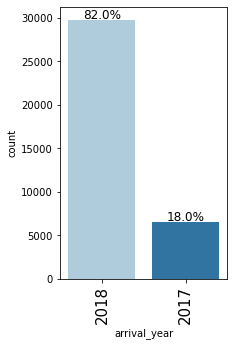

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(df, "arrival_year", perc=True)

* The arrival year for all booking is either 2017 or 2018.
* 82.0% of booking have arrival year of 2018.

### **Question 1:** What are the busiest months in the hotel?

### Observations on arrival month 

In [31]:
df.arrival_month.value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

<IPython.core.display.Javascript object>

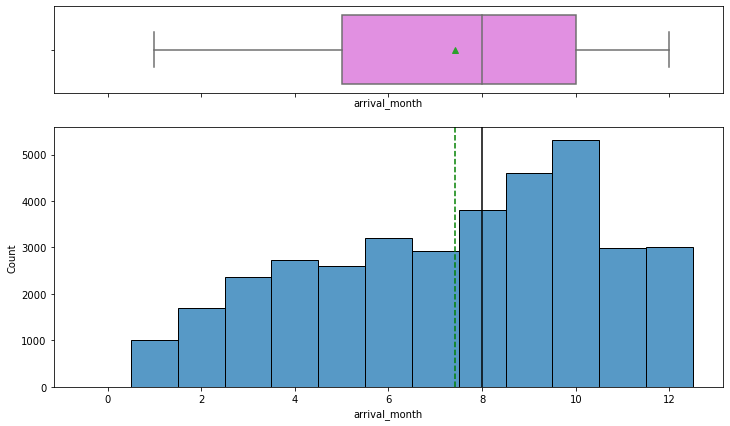

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(df, "arrival_month", binrange=[-0.5, 12.5], binwidth=1)

* October is the busiest month with 5713 bookings, followed by September, and then August.
* The median arrival month is August.
* There are no outliers in the arrival month distribution.

### Observations on arrival date

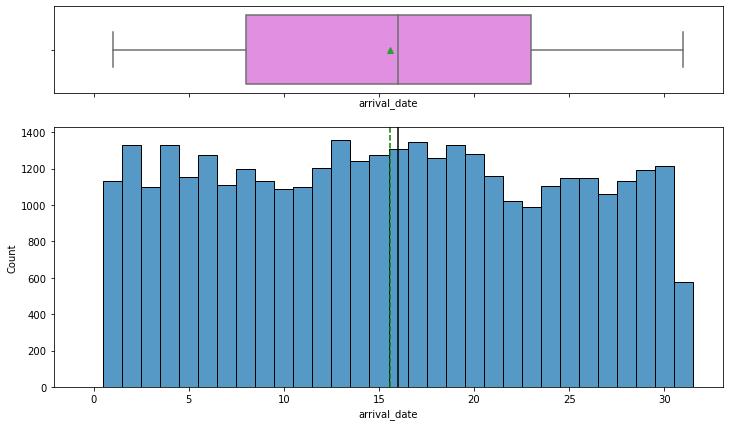

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(df, "arrival_date", binrange=[-0.5, 31.5], binwidth=1)

* The distribution of arrival dates is fairly uniform.
* The 31st is less common since not all months have a 31st.

### **Question 2:** Which market segment do most of the guests come from?

###  Observations on market segment type

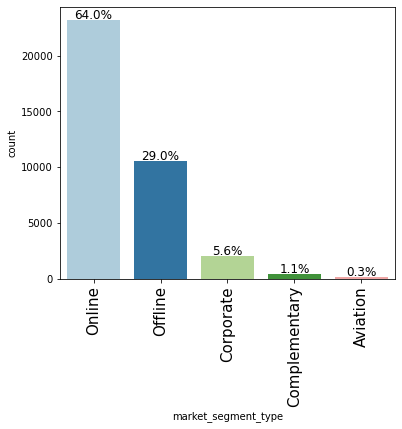

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(df, "market_segment_type", perc=True)

* Most guests (64.0%) come from the Online market segment.
* 29.0% of guests come from the Offline market segment.
* 5.6% of guests come from the Corporate market segment.
* Complementary and Aviation market segments have the smallest fraction of guests.

### Observations on repeated guests

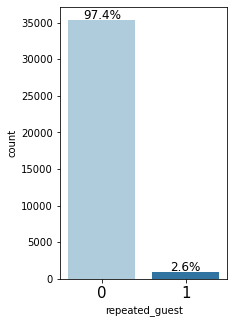

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(df, "repeated_guest", perc=True, r=0)

* 97.4% of guests are not repeat guests, 2.6% are repeat guests.

### Observations on number of previous cancellations

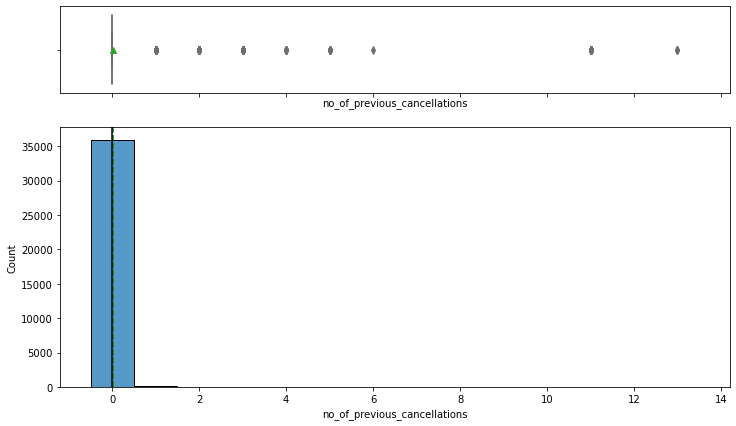

<IPython.core.display.Javascript object>

In [36]:
histogram_boxplot(df, "no_of_previous_cancellations", binrange=[-0.5, 13.5], binwidth=1)

* Most commonly (mode) there are 0 previous cancellations.
* The number of previous cancellations ranges from 0 to 13.

### Observations on number of previous bookings not canceled

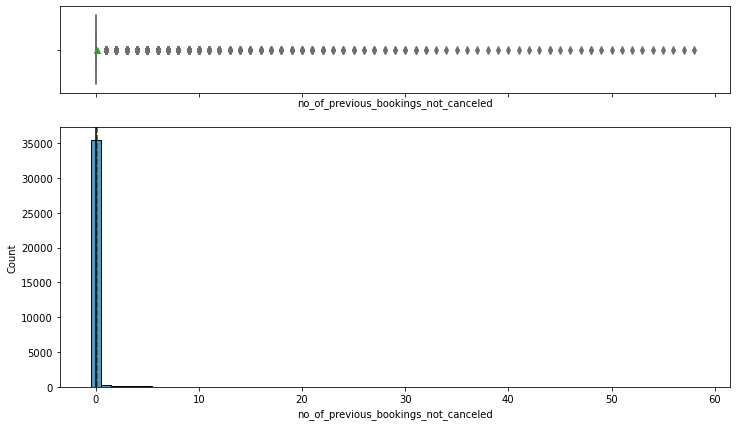

<IPython.core.display.Javascript object>

In [37]:
histogram_boxplot(
    df, "no_of_previous_bookings_not_canceled", binrange=[-0.5, 58.5], binwidth=1
)

* Most commonly (mode) there are 0 previous bookings not canceled.
* The number of previous bookings not canceled ranges from 0 to 58.

### Observations on average price per room

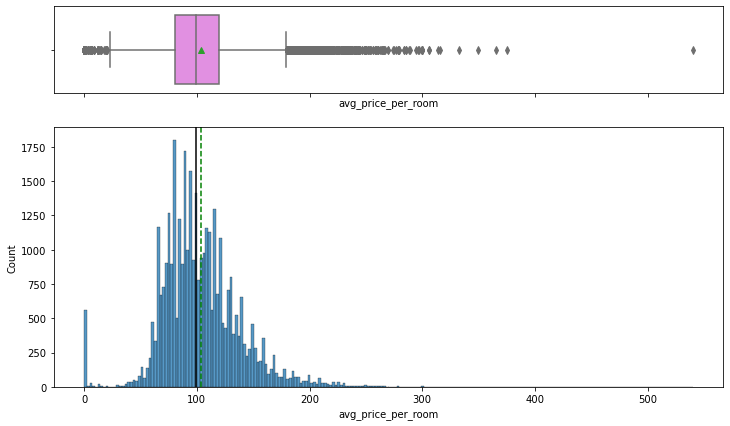

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(df, "avg_price_per_room")

* The avg_price_per_room distribution is close to normally distributed. However, there is a spike at 0 indicating that several bookings are comped.
* Most outliers are on the high side of the distrubution, but there are outliers on both sides.
* The mean and median average price per room are both close to 100 euros.

### Observations on number of special requests

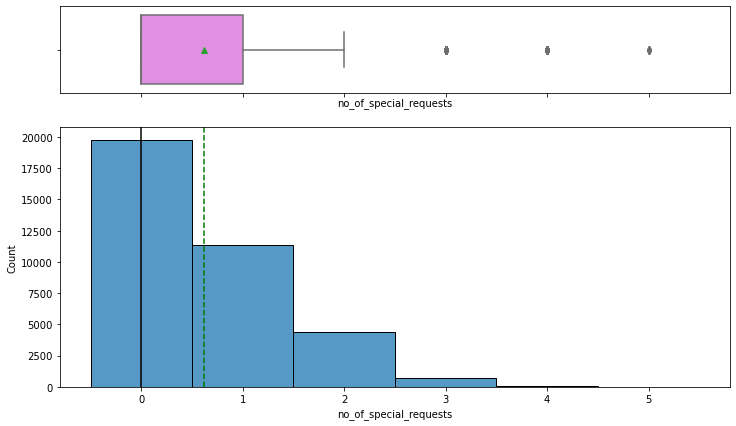

<IPython.core.display.Javascript object>

In [39]:
histogram_boxplot(df, "no_of_special_requests", binrange=[-0.5, 5.5], binwidth=1)

* The mode is 0 special requests.
* The distribution ranges from 0 to 5 special requests.
* The number of occurences decrease as the number of special requests increases.

## Bivariate Analysis & Answers to Q's 3-6

In [40]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### **Question 3:** Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

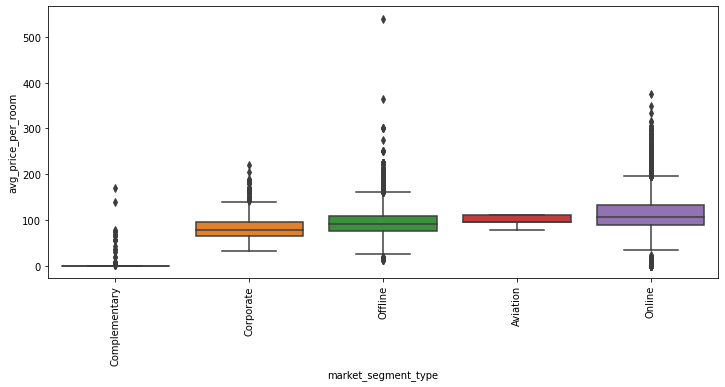

<IPython.core.display.Javascript object>

In [41]:
# create a new df that is grouped by market_segment
market_segment_df = df.groupby("market_segment_type")
sns.boxplot(
    x="market_segment_type",
    y="avg_price_per_room",
    data=df,
    order=market_segment_df.avg_price_per_room.median().sort_values().index,
)
plt.gcf().set_size_inches(12, 5)
plt.xticks(rotation=90)

* The Online market segment has the greatest median avg_price_per_room.
* All market segment types except for Aviation have outliers in the average price per room.
* The Complimentary market segment has the lowest median avg_price_per_room.

### Observations on number of nights and average room price

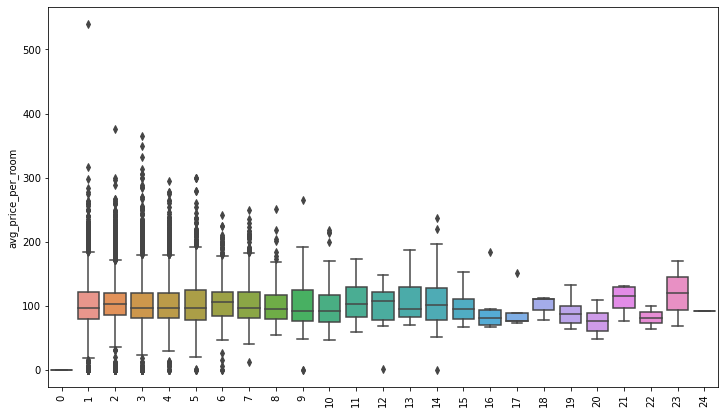

<IPython.core.display.Javascript object>

In [42]:
# add weekend and weekday nights
nights = df["no_of_weekend_nights"] + df["no_of_week_nights"]
sns.boxplot(
    x=nights,
    y="avg_price_per_room",
    data=df,
    # order=market_segment_df.avg_price_per_room.median().sort_values().index,
)
plt.gcf().set_size_inches(12, 7)
plt.xticks(rotation=90)

* The median average room price per night is fairly uniform with the number of nights booked.
* Bookings with shorter durations have more outliers in average room price per night distribution.

### Observations on average price per room by room type and lead time

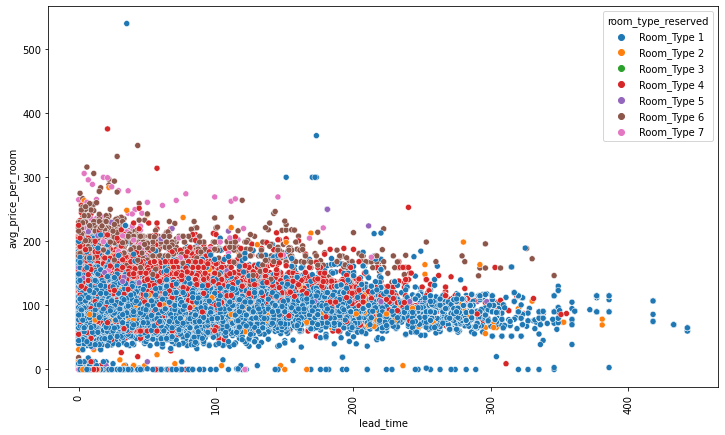

<IPython.core.display.Javascript object>

In [43]:
sns.scatterplot(
    x="lead_time",
    y="avg_price_per_room",
    hue="room_type_reserved",
    data=df,
    # order=market_segment_df.avg_price_per_room.median().sort_values().index,
)
plt.gcf().set_size_inches(12, 7)
plt.xticks(rotation=90)

* It appears that the average price per room for a given room type is fairly independent of lead time.
* Room type 1 appears to get booked the earliest in advance.
* Room type 4 and room type 6 appear to start getting more bookings around 200 days in advance.
* Room type 7 appears to get more bookings starting around 100 days in advance.
* Room types 1 and 2 have the least expensive average price per night, followed by room type 4, then 6, and lastly type 7.


### **Question 4:** What percentage of bookings are canceled? 

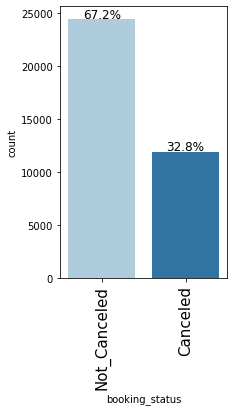

<IPython.core.display.Javascript object>

In [44]:
labeled_barplot(df, "booking_status", perc=True)

* 32.8% of bookings are canceled. 

In [45]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### **Question 5:** Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


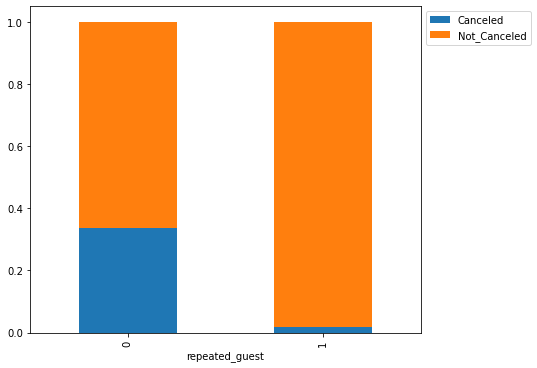

<IPython.core.display.Javascript object>

In [46]:
stacked_barplot(df, "repeated_guest", "booking_status")

* Of the repeated guest bookings 1.7% are canceled and 98.3% are not canceled.
* Of the new guests bookings 33.6% are canceled and 66.4% are not canceled.

### **Question 6:** Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


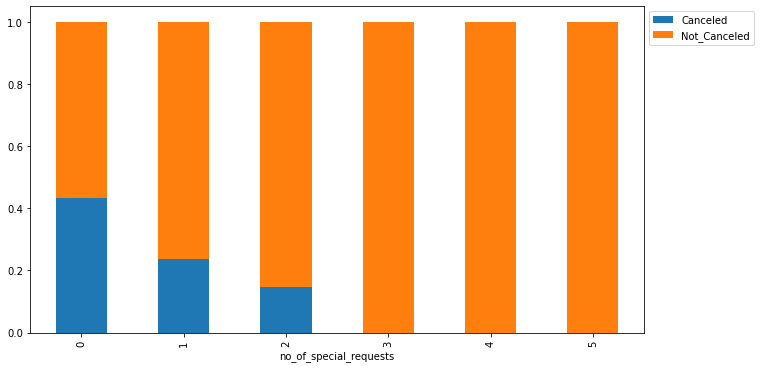

<IPython.core.display.Javascript object>

In [47]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

* The majority of guests who canceled have no special requests. Of the 11885 bookings canceled, 8545 or (~72% have no special requests).
* In general, as the number of special requests increases, the proportion of cancellations decreases.

### Observations on market segment type and booking status

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


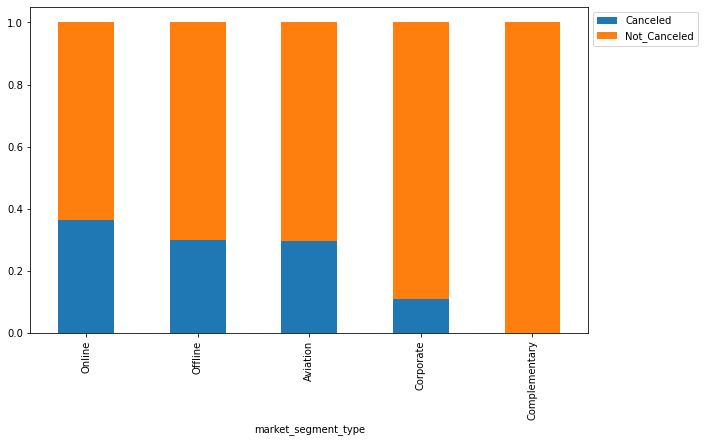

<IPython.core.display.Javascript object>

In [48]:
stacked_barplot(df, "market_segment_type", "booking_status")

* The market segment type with the largest proportion Canceled to Not_Canceled is Online, followed by Offline, Aviation, and then Corporate.
* Complementary has 0 cancellations.

### Observations on type of meal plan and booking status

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


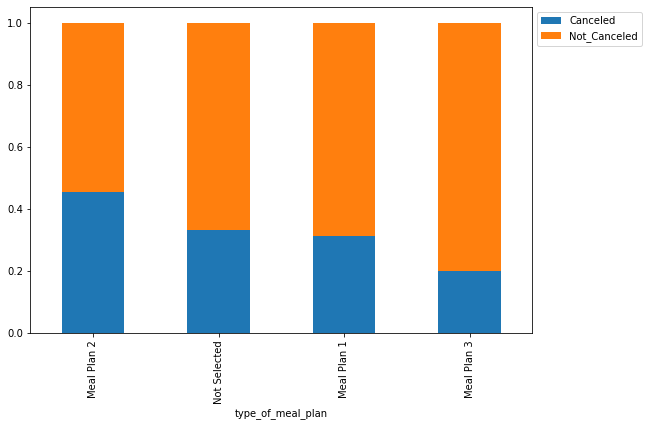

<IPython.core.display.Javascript object>

In [49]:
stacked_barplot(df, "type_of_meal_plan", "booking_status")

* Of the meal plan types, the largest fraction of cancellations correspond with Meal Plan 2, followed by Not Selected, then Meal Plan 1, and lastly Meal Plan 3.

### Observations on number of children and booking status

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


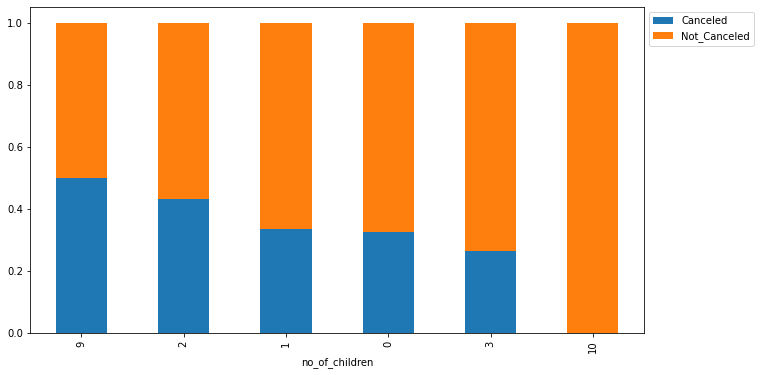

<IPython.core.display.Javascript object>

In [50]:
# create a stacked bar plot to compare the distributions of both the categorical features
stacked_barplot(df, "no_of_children", "booking_status")

* Of bookings ranging from 0-3 children, rooms with 2 children have the largest proportion of canceled to not canceled.

### Observations on number of adults and booking status

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


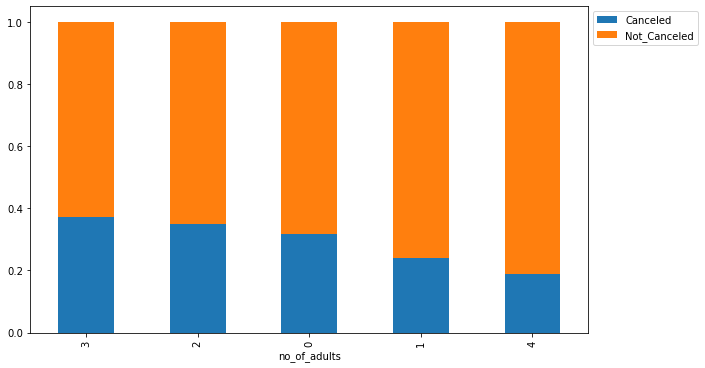

<IPython.core.display.Javascript object>

In [51]:
# create a stacked bar plot to compare the distributions of both the categorical features
stacked_barplot(df, "no_of_adults", "booking_status")

* Bookings with 3 adults have the largest fraction of cancelations.

### Observations on room type reserved and booking status

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


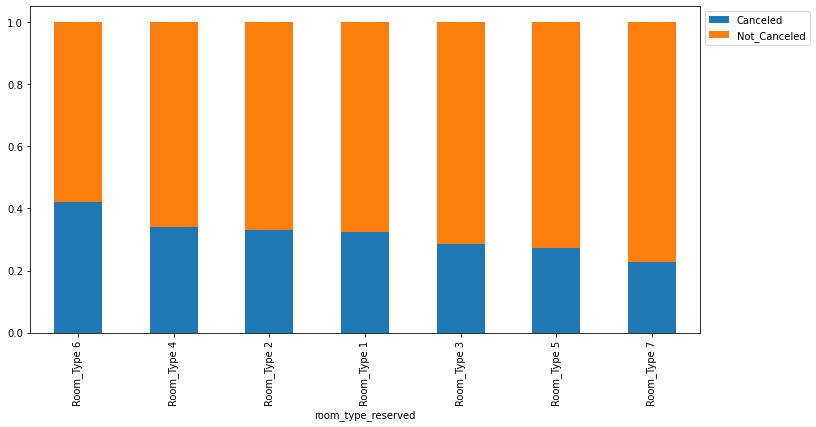

<IPython.core.display.Javascript object>

In [52]:
# create a stacked bar plot to compare the distributions of both the categorical features
stacked_barplot(df, "room_type_reserved", "booking_status")

* Room Type 6 has the largest fraction of cancelations.

### Observations on arrival year and booking status

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


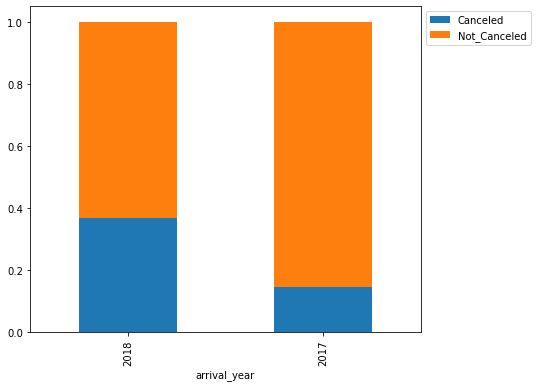

<IPython.core.display.Javascript object>

In [53]:
# create a stacked bar plot to compare the distributions of both the categorical features
stacked_barplot(df, "arrival_year", "booking_status")

* A larger fraction of 2018 bookings are canceled than 2017 bookings.

### Observations on arrival month and booking status

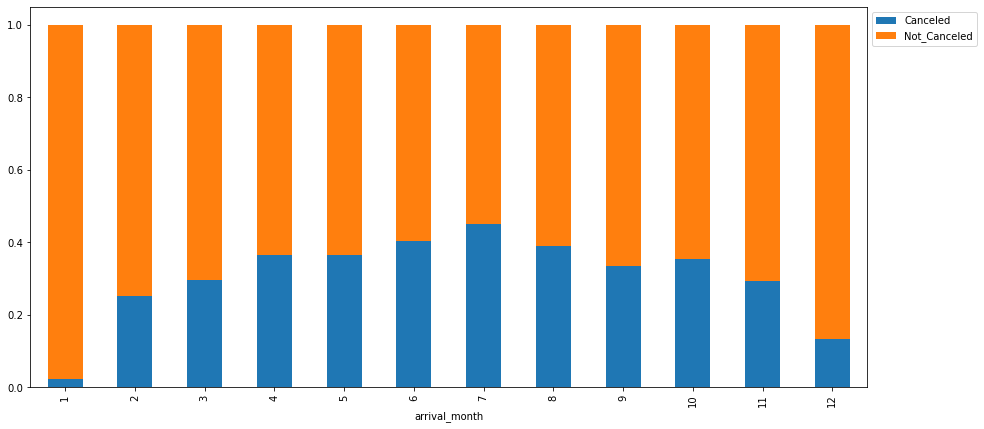

<IPython.core.display.Javascript object>

In [54]:
# create a stacked bar plot to compare the distributions of both the categorical features
pd.crosstab(df["arrival_month"], df["booking_status"], normalize="index").plot(
    kind="bar", stacked=True
)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.gcf().set_size_inches(15, 7)

* It appears that a larger fraction of bookings are canceled during the summer months.

### Observations on arrival date and booking status

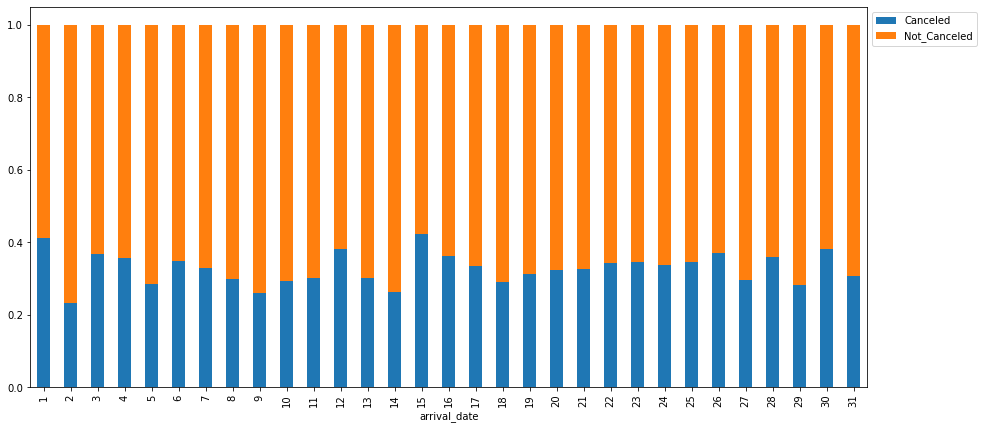

<IPython.core.display.Javascript object>

In [55]:
# create a stacked bar plot to compare the distributions of both the categorical features
pd.crosstab(df["arrival_date"], df["booking_status"], normalize="index").plot(
    kind="bar", stacked=True
)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.gcf().set_size_inches(15, 7)

* The fraction of booking canceld by arrival date appear fairly evenly spread over all dates.

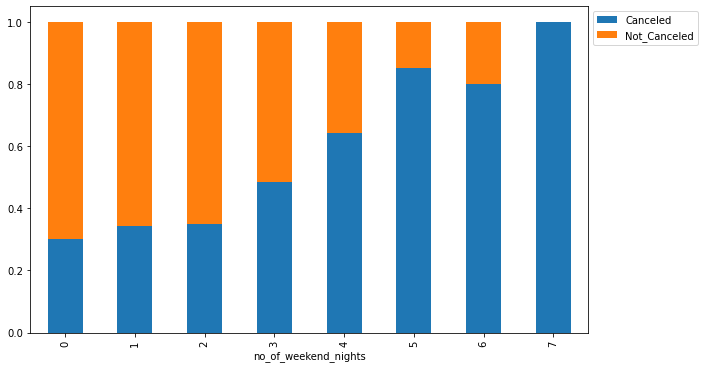

<IPython.core.display.Javascript object>

In [56]:
# create a stacked bar plot to compare the distributions of both the categorical features
pd.crosstab(df["no_of_weekend_nights"], df["booking_status"], normalize="index").plot(
    kind="bar", stacked=True
)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.gcf().set_size_inches(10, 6)

* In general, the fraction of canceled bookings increases with the number of weekend nights.

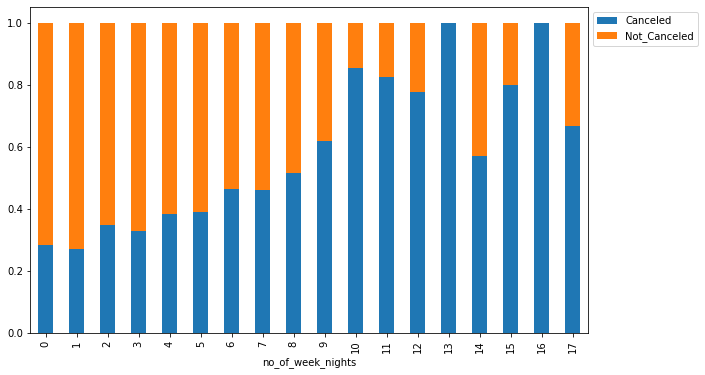

<IPython.core.display.Javascript object>

In [57]:
# create a stacked bar plot to compare the distributions of both the categorical features
pd.crosstab(df["no_of_week_nights"], df["booking_status"], normalize="index").plot(
    kind="bar", stacked=True
)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.gcf().set_size_inches(10, 6)

* In general, the fraction of canceled bookings increases with the number of week nights.

### Observations of booking status and lead time

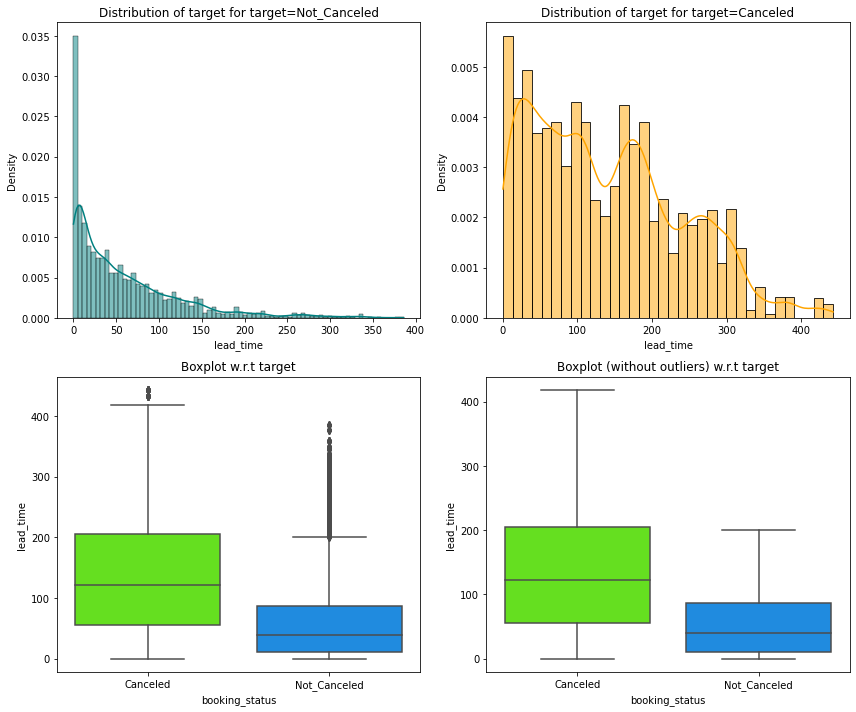

<IPython.core.display.Javascript object>

In [58]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

- The median lead time for canceled bookings is greater than the median lead time for not_canceled bookings.
- There are outliers in boxplots of both class distributions.

### Observations on Booking Status and Average Price per Room

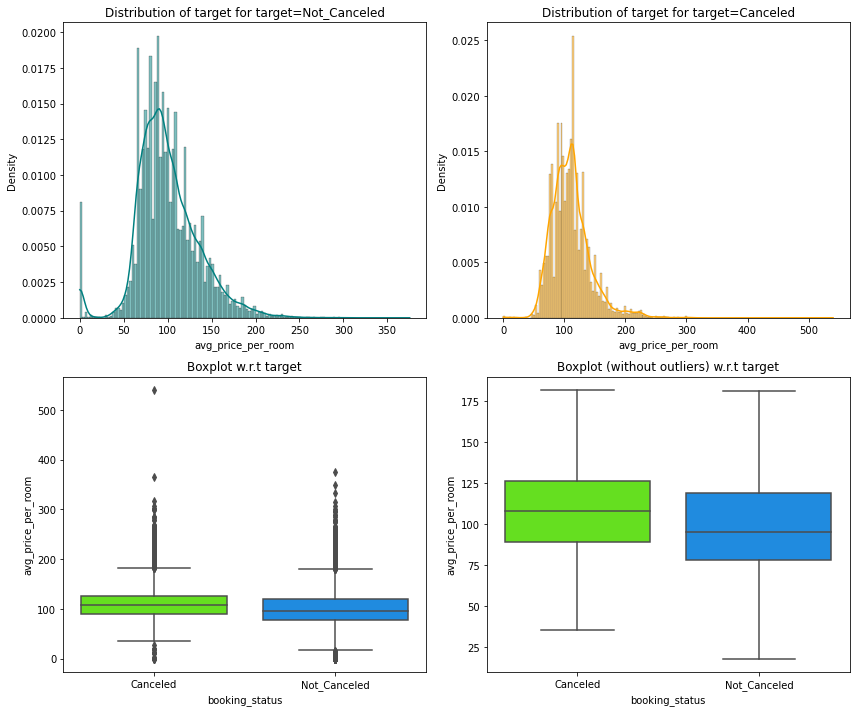

<IPython.core.display.Javascript object>

In [59]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

* The average price per room distribution between Cancelled and Not_Cancelled bookings is similar, although not canceled rooms have a spike at zero indicating that comped rooms are typically not canceled. 
* Canceled bookings have a higher median avg_price_per_room.

### Observations on average room price by room type reserved and booking status

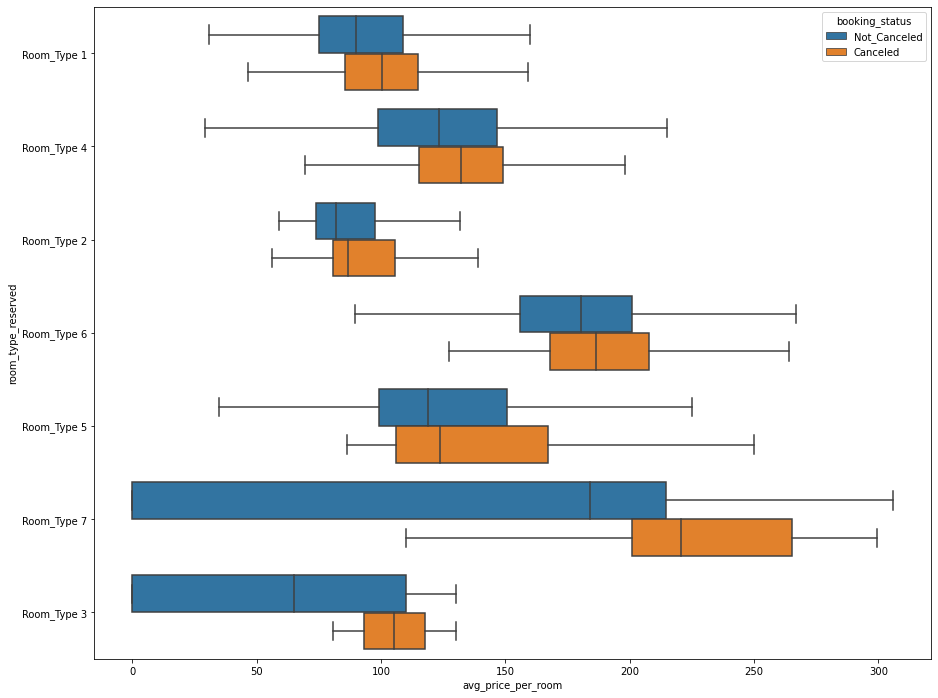

<IPython.core.display.Javascript object>

In [60]:
# average room price by room, divided by canceled and not canceled
plt.figure(figsize=(15, 12))
sns.boxplot(
    y="room_type_reserved",
    x="avg_price_per_room",
    data=data,
    hue="booking_status",
    showfliers=False,
)
plt.show()

* Room type 7 shows the largest range in average price per night.
* For any given room, the median price per night is higher for canceled than not canceled.
* The largest differences in median price per night in the canceled vs not canceled distributions occur in Room Type 7 and Room Type 8.

### Correlation heat map between numeric independent variables

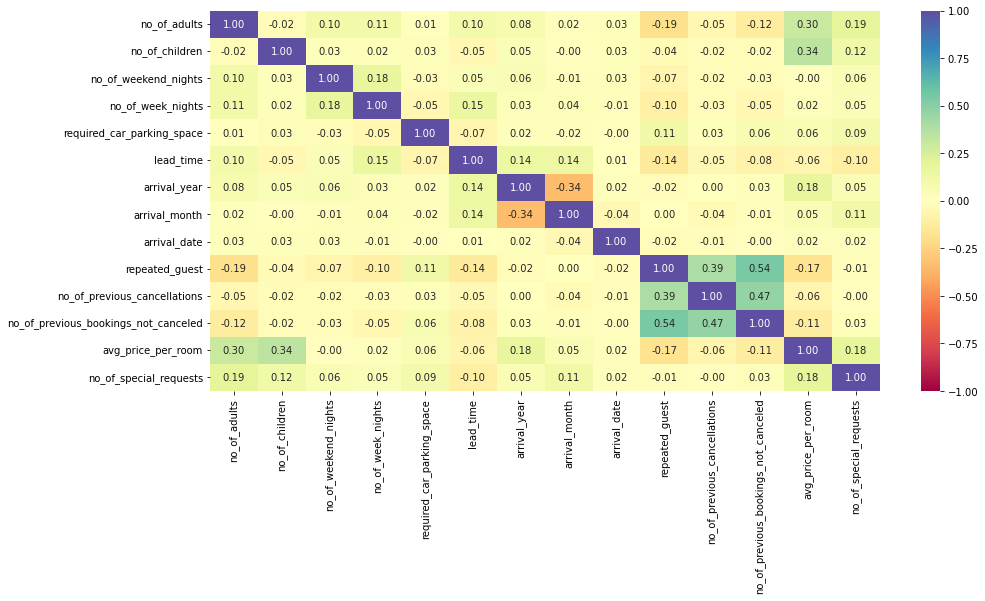

<IPython.core.display.Javascript object>

In [61]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There are no strong correlations among the predictor variables.

### Summary of EDA

* `booking_status`: Almost 1/3 of the total hotel bookings are canceled (32.8%).
* `arrival year`: There two arrival years - 2017 and 2018. There are more bookings in 2018. A larger fraction of bookings were canceled in 2018 than in 2017.
* `arrival month`: October is the busiest month with 5713 bookings, followed by September, and then August. January is the slowest month with 1014 bookings.
* `arrival day`: The arrival day of the month is fairly uniform.
* `market segment`: There are five market segments: Online, Offline, Corporate, Complimentary, and Aviation. Most guests (64.0%) come from the Online market segment and the least guests come from the Aviation market segment (0.3%). The median avg_price_per_night is the greatest for the Online market segment and the least for the Complimentary market segment. The Online market segment has the highest fraction of canceled bookings.
* `repeated_guests`: Only 2.6% of guests are repeat customers. Of the repeated guest bookings 1.7% are canceled and 98.3% are not canceled. Of the new guests bookings 33.6% are canceled and 66.4% are not canceled.
* `no_of_adults`: The majority of bookings have 2 adults - 72% of the room bookings have 2 adults.
* `no_of_children`: Most room bookings have no children (92.6%), followed by 1 child (4.5%), and then 2 (2.9%) children.
* `booking_status vs special_requests`: More cancellations correspond with less special requests. About 72% of the total bookings canceled have 0 special requests.
* `average_room_price`: Bookings with higher average room prices are more likely to be canceled. The not canceled average room time distribution has a spike at 0 average price, showing that comped rooms are generally not canceled.
* `lead_time`: Canceled bookings have a longer median lead time than Not Canceled bookings.
* `no_of_week_nighs` and `no_of_weekend_nighs`: Bookings for longer stays correspond with a larger fraction of canceled bookings.
* `no_of_special_requests`: More special requests correspond with less canceled bookings.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [62]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values

### Feature Engineering

In [63]:
# Each booking has a unique ID and there are no duplicates - dropping Booking ID
df.drop(["Booking_ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [64]:
replaceStruct = {
    "booking_status": {"Not_Canceled": 0, "Canceled": 1},
}

<IPython.core.display.Javascript object>

In [65]:
df = df.replace(replaceStruct)

<IPython.core.display.Javascript object>

In [66]:
# Combining weekend and weekday nights
df["no_of_nights"] = df["no_of_weekend_nights"] + df["no_of_week_nights"]
df.drop(["no_of_weekend_nights", "no_of_week_nights"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Outlier Detection

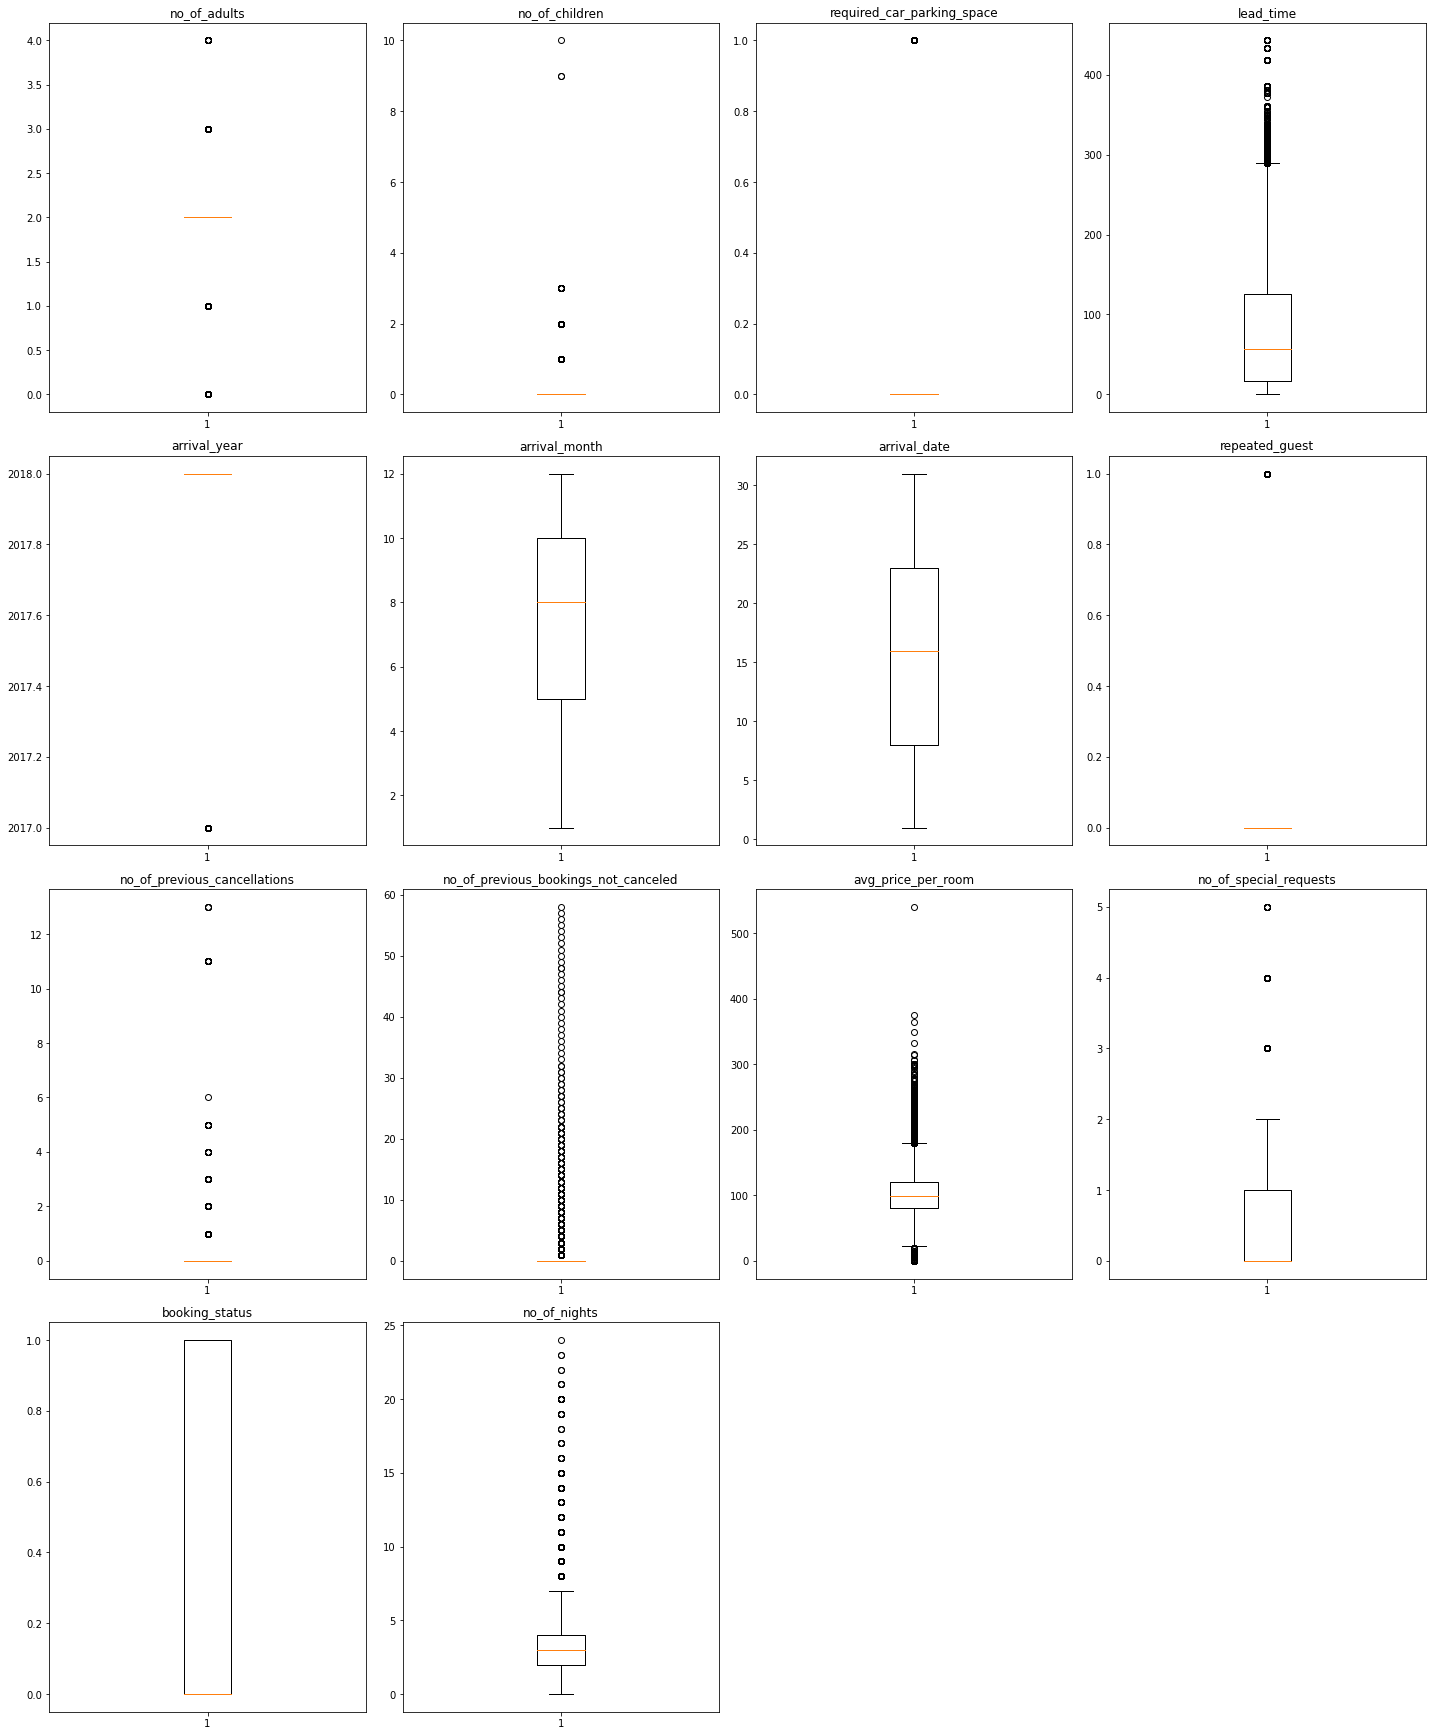

<IPython.core.display.Javascript object>

In [67]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All predictors, other than arrival month and arrival date have outliers.
* In order to maintain variability, most outliers will be kept.
* There are several outliers in the average price per room distribution, the outlier above 500 euros is particularly far away from the rest of the distribution.
* There are a few exteme values for number of children (9 & 10 children) which appear anomolous and are addressed below.

#### Treating average price per room largest outlier

In [68]:
price = df[df["avg_price_per_room"] > 500.00]
price.shape

(1, 17)

<IPython.core.display.Javascript object>

* The booking with the average price per room  of 540 euros, is not during a busy month, it is only two adults, booked 35 days in advance for 1 night with no special requests. 
* The value of this outlier will be changed to the average price of the room type 1.

In [69]:
av_room_price = df.groupby("room_type_reserved")["avg_price_per_room"].median()
av_room_price

room_type_reserved
Room_Type 1     94.500
Room_Type 2     85.225
Room_Type 3     80.750
Room_Type 4    127.800
Room_Type 5    120.000
Room_Type 6    182.000
Room_Type 7    192.725
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

In [70]:
df["avg_price_per_room"] = df["avg_price_per_room"].replace([540], np.nan)

<IPython.core.display.Javascript object>

In [71]:
# Let's impute missing values using mean value
df["avg_price_per_room"] = df["avg_price_per_room"].fillna(av_room_price["Room_Type 1"])

<IPython.core.display.Javascript object>

#### Treating Number of Children Outliers of 9 & 10 Children

In [72]:
# Bookings with >8 children
num = df[df["no_of_children"] > 8]
num.shape

(3, 17)

<IPython.core.display.Javascript object>

In [73]:
df["no_of_children"] = df["no_of_children"].replace([9, 10], np.nan)

<IPython.core.display.Javascript object>

In [74]:
# Bookings with >8 children
num = df[df["no_of_children"] > 8]
num.shape

(0, 17)

<IPython.core.display.Javascript object>

In [75]:
# Let's impute missing values using mean value
df["no_of_children"] = df["no_of_children"].fillna(df["no_of_children"].median())

<IPython.core.display.Javascript object>

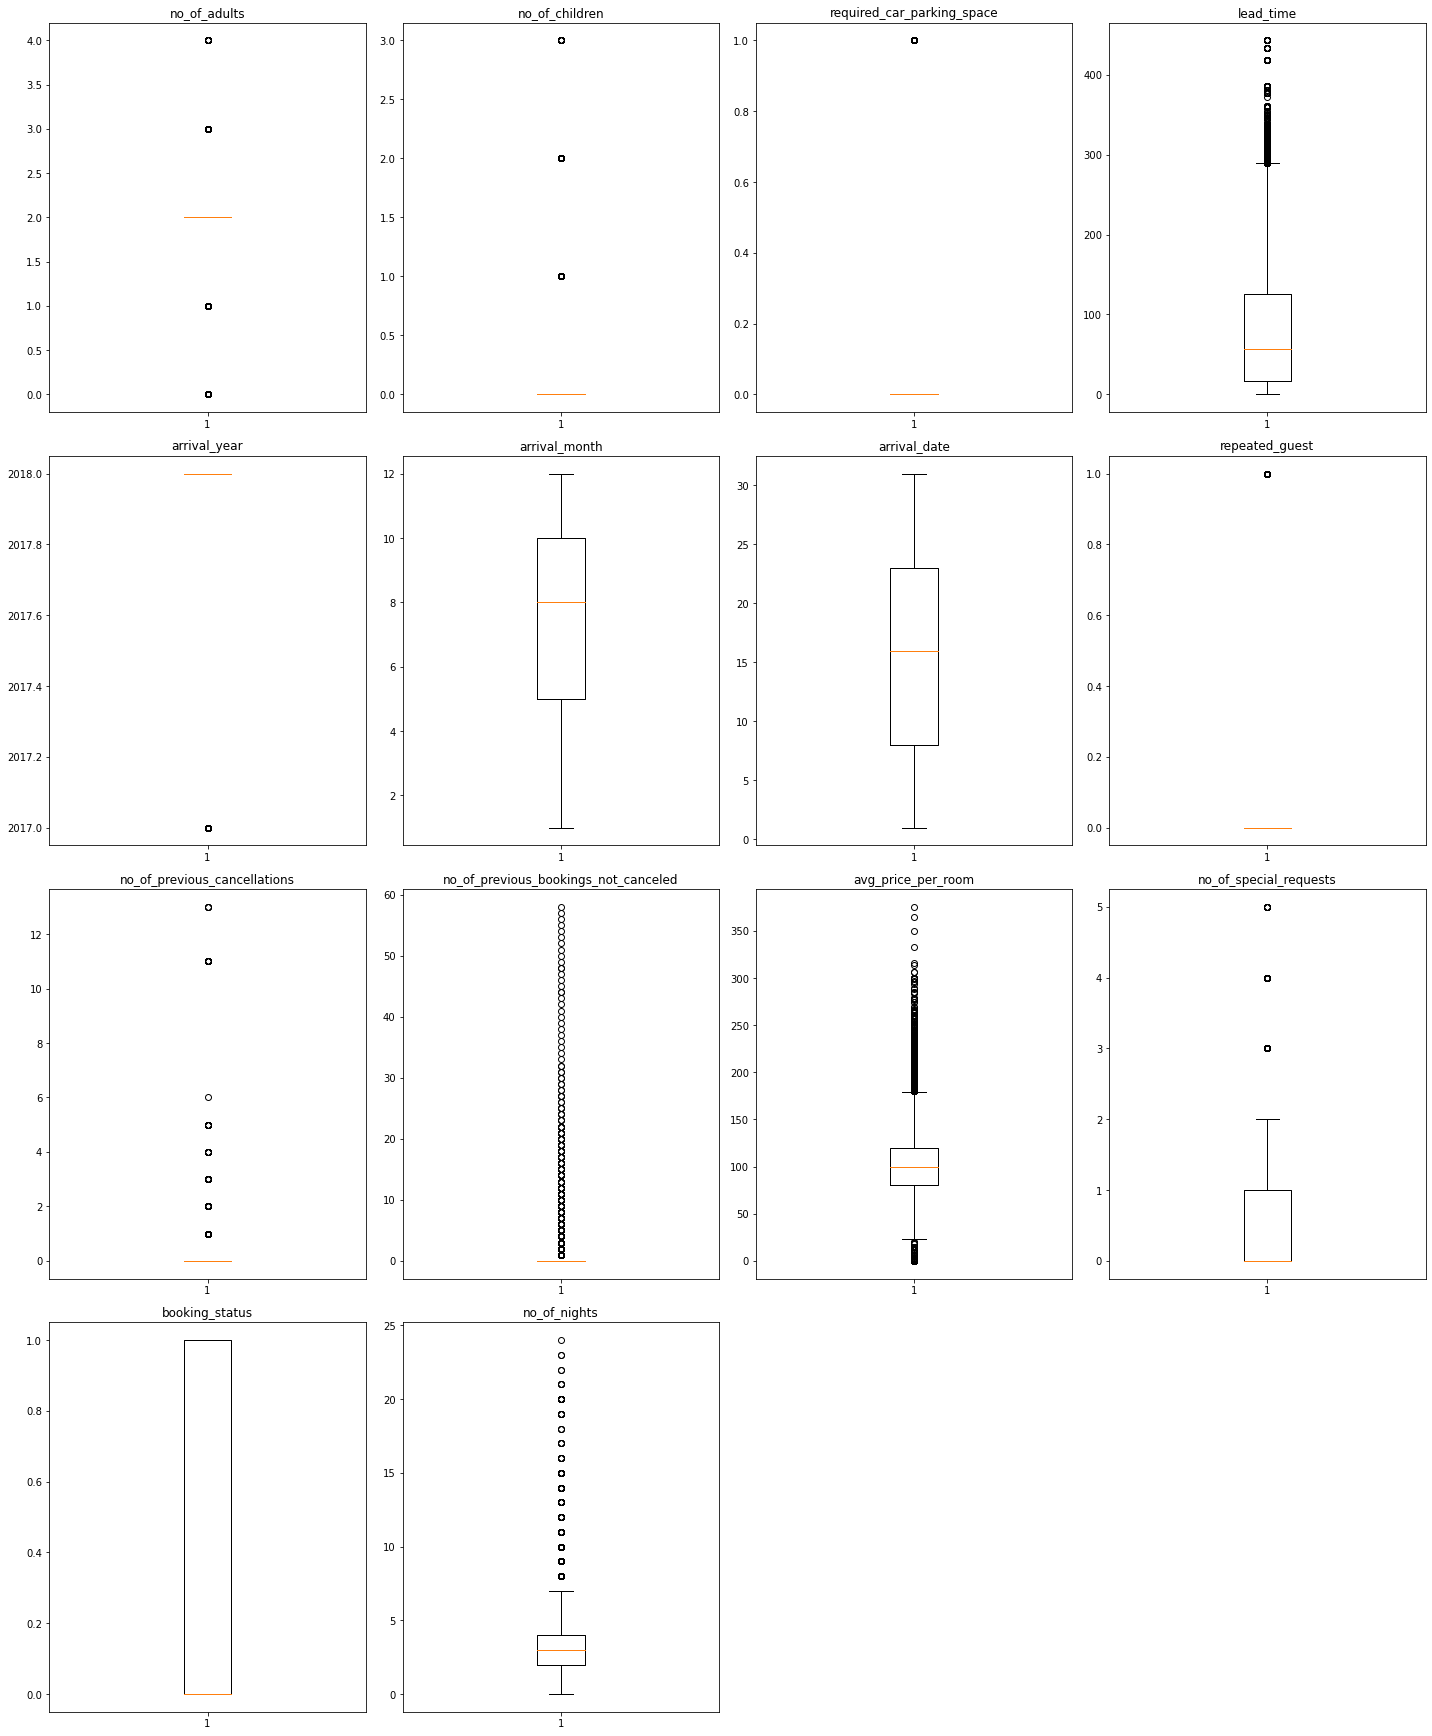

<IPython.core.display.Javascript object>

In [76]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

#### Observations on average price per room

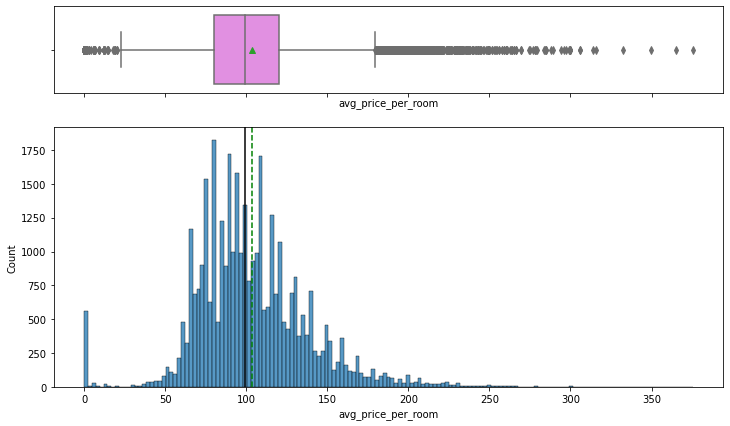

<IPython.core.display.Javascript object>

In [77]:
histogram_boxplot(df, "avg_price_per_room")

* The average price per room still contains outliers but the most extreme outlier has been imputed.

#### Observations on booking status with number of children

booking_status      0      1    All
no_of_children                     
All             24390  11885  36275
0.0             22697  10883  33580
1.0              1078    540   1618
2.0               601    457   1058
3.0                14      5     19
------------------------------------------------------------------------------------------------------------------------


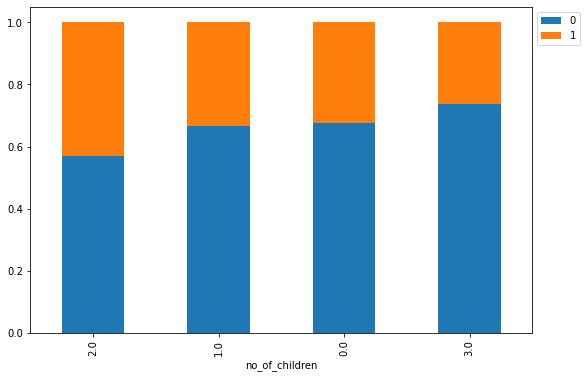

<IPython.core.display.Javascript object>

In [78]:
# create a stacked bar plot to compare the distributions of both the categorical features
stacked_barplot(df, "no_of_children", "booking_status")

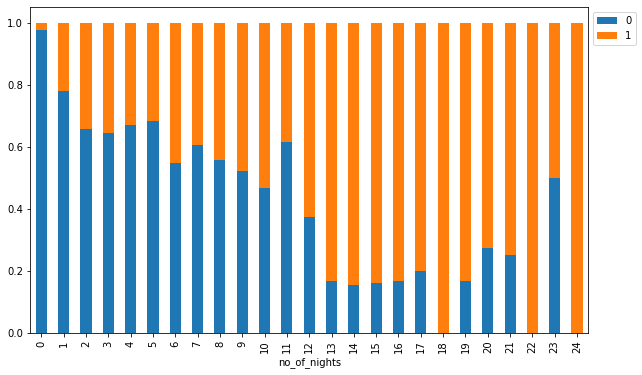

<IPython.core.display.Javascript object>

In [79]:
# create a stacked bar plot to compare the distributions of both the categorical features
pd.crosstab(df["no_of_nights"], df["booking_status"], normalize="index").plot(
    kind="bar", stacked=True
)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.gcf().set_size_inches(10, 6)

### Distribution of target variable

In [80]:
df["booking_status"].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

In [81]:
df["booking_status"].value_counts(1)

0    0.672364
1    0.327636
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

### Splitting data into train and test sets

In [82]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding a contstant to X variable
X = add_constant(X)

# creating dummies
X = pd.get_dummies(X, drop_first=True)


# Splitting data in train and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [83]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0    0.672377
1    0.327623
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.672333
1    0.327667
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

## Building a Logistic Regression model

### Model evaluation criterion

### Model can make wrong predictions as:
1. FP - Predicting a booking will be canceled but in reality the booking is not canceled.
2. FN - Predicting a booking will be not canceled but in reality the booking is canceled.

### Which case is more important? 
* Since the company is trying to reduce loss of resources, in this case reducing false negatives is more important.

### How to reduce loss of resources i.e need to reduce False Negatives?
* Recall score is an important measure to maximize when trying to reduce false negatives. It is defined as:  $\frac{TN}{TN + FP}$ 
* `f1_score` should also be maximized, the greater the f1_score higher the chances of identifying both the classes correctly. F1 score takes both precision ($\frac{TN}{TN + FN}$) and recall into account. $F_{1}$ = $\frac{2*P*R}{P+R}$

* The model_performance_classification_statsmodels function will be used to check the model performance metrics. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [84]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [85]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [86]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.3315
Time:                        23:36:59   Log-Likelihood:                -10737.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -895.1697    121.189     -7.387      0.000   -1132.696    -657.643
no_of_adults                             0.0370      

<IPython.core.display.Javascript object>

In [87]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.806986,0.632648,0.740433,0.68231


<IPython.core.display.Javascript object>

**Observations**
- Cancelation of the booking corresponds with 1 and keeping the booking corresponds with 0.

- Positive values of the coefficient shows that probability of booking cancelation increases with increase of corresponding attribute value.

- negative values of the coefficient show that that probability of not cancelling the booking increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- The model performs reasonably well on the training set.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [89]:
checking_vif(X_train)

,feature,VIF
0,const,3.957794e+07
1,no_of_adults,1.345960e+00
2,no_of_children,2.095414e+00
3,required_car_parking_space,1.034982e+00
4,lead_time,1.398369e+00
5,arrival_year,1.432631e+00
6,arrival_month,1.278045e+00
7,arrival_date,1.006749e+00
8,repeated_guest,1.750231e+00
9,no_of_previous_cancellations,1.322000e+00


<IPython.core.display.Javascript object>

* There are no issues with multicollinearity

### Dropping variables with p values > 0.05
* $H_o$ : Independent feature is not significant ($\beta_i = 0$)
* $H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)


* (P>|t|) gives the p-value for each independent feature to check that null hypothesis. Using 0.05 (5%) as significance level.
        
* A p-value of less than 0.05 is considered to be statistically significant.

In [90]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'no_of_nights', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

In [91]:
X_train2 = X_train[selected_features]
X_test2 = X_test[selected_features]

<IPython.core.display.Javascript object>

In [92]:
# fitting logistic regression model
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25373
Method:                           MLE   Df Model:                           18
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.3304
Time:                        23:37:02   Log-Likelihood:                -10753.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -876.1538    120.772     -7.255      0.000   -1112.862    -639.446
required_car_parking_space        -1.6097      0.137    -11.762      0.

<IPython.core.display.Javascript object>

In [93]:
print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.807302,0.632648,0.741268,0.682664


<IPython.core.display.Javascript object>

* There is no significant change in the model performance as compared to initial model.

**Now no feature has p-value greater than 0.05, so the features in *X_train2* will be considered as the final ones and *lg2* as final model.****

## Model performance evaluation

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [94]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,no_of_nights,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.0,0.199952,1.015928,1.541692,0.951670,0.046410,1.336074,1.019072,0.226981,1.073746,1.190327,1.230469,0.686588,0.762101,0.506982,0.478168,0.267992,0.408266,0.168851
Change_odd%,-100.0,-80.004781,1.592803,54.169173,-4.832972,-95.359025,33.607353,1.907223,-77.301897,7.374569,19.032667,23.046944,-31.341196,-23.789877,-49.301766,-52.183244,-73.200756,-59.173375,-83.114871


<IPython.core.display.Javascript object>

### Coefficient interpretations

* `required_parking_space`: Holding all other features constant a 1 unit change in required_car_parking_space will decrease the odds of a cancellation by 0.2 times or a 80% decrease in odds of a canceled booking.
* `lead_time`: Holding all other features constant a 1 unit change in lead_time will increase the odds of a cancellation by 1.02 times or a 1.59% increase in odds of a canceled booking.
* `arrival_year`: Holding all other features constant a 1 unit change in arrival_year will increase the odds of a cancellation by 1.54 times or a 54.17% increase in odds of a canceled booking.
* `arrival_month`: Holding all other features constant a 1 unit change in arrival_month will decrease the odds of a cancellation by 0.95 times or a 4.83% decrease in odds of a canceled booking.
* `repeated_guest`: Holding all other features constant a repeated guest (rather than new guest) will decrease the odds of a cancellation by 0.04 times or a 95.35% decrease in odds of a canceled booking.
* `Interpretation for other attributes can be done similarly.`

#### Checking model performance on the training set

#### Default Threshold = 0.50

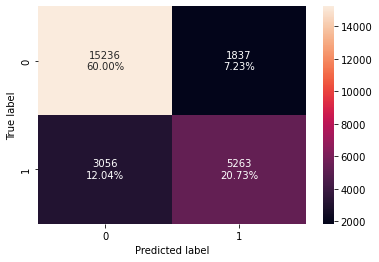

<IPython.core.display.Javascript object>

In [95]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

#### The confusion matrix

* True Positives (TP):  A booking is canceled and the model predicted it would be canceled.
* True Negatives (TN): A booking was not canceled and the model predicted it wouldn't be canceled.
* False Positives (FP): The model predicted a booking would be canceled but it was not canceled.
* False Negatives (FN): The model predicted a booking would not be canceled, but it was canceled.

In [96]:
# showing model performance on training set 1 more time (same as above)
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.807302,0.632648,0.741268,0.682664


<IPython.core.display.Javascript object>

#### ROC-AUC

* ROC-AUC on training set

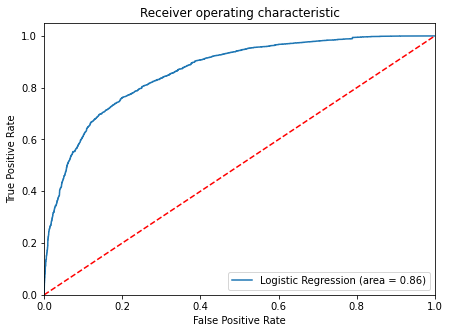

<IPython.core.display.Javascript object>

In [97]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [98]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3406354794537673


<IPython.core.display.Javascript object>

#### Checking model performance on training set

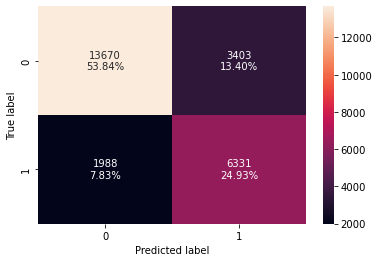

<IPython.core.display.Javascript object>

In [99]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [100]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.787689,0.761029,0.650401,0.701379


<IPython.core.display.Javascript object>

* The Recall and F1 have increased but the other metrics have reduced.
* The model is still giving a good performance.

#### Let's use Precision-Recall curve and see if we can find a better threshold

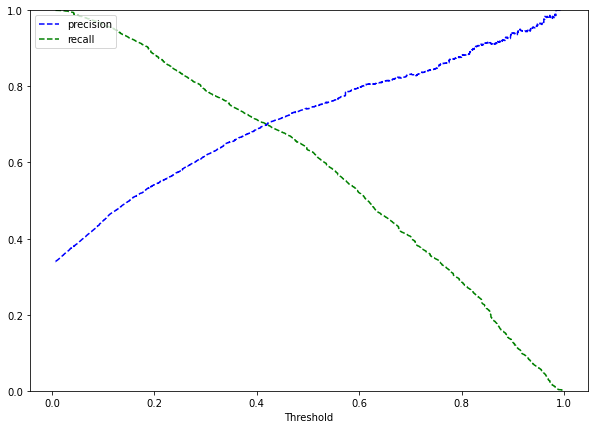

<IPython.core.display.Javascript object>

In [101]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [102]:
# setting the threshold
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

#### Checking model performance on training set

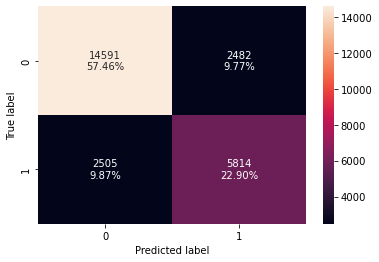

<IPython.core.display.Javascript object>

In [103]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [104]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8036,0.698882,0.70082,0.69985


<IPython.core.display.Javascript object>

* Model is performing well on training set.
* The Recall Score is better with a threshold = 0.42 than at the 0.50 default value.

### Model Performance Summary

In [105]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.34 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.34 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.807302,0.787689,0.803600
Recall,0.632648,0.761029,0.698882
Precision,0.741268,0.650401,0.700820
F1,0.682664,0.701379,0.699850


<IPython.core.display.Javascript object>

### Let's check the performance on the test set

#### Default Threshold = 0.50

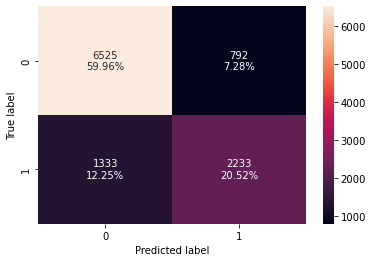

<IPython.core.display.Javascript object>

In [106]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [107]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.804741,0.626192,0.738182,0.677591


<IPython.core.display.Javascript object>

* ROC curve on test set

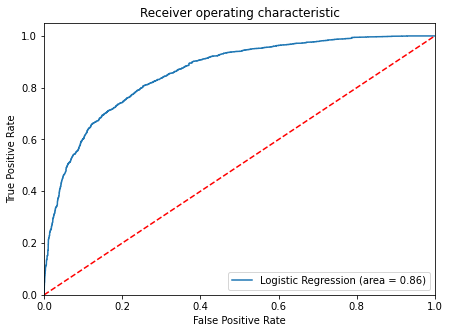

<IPython.core.display.Javascript object>

In [108]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.34** 

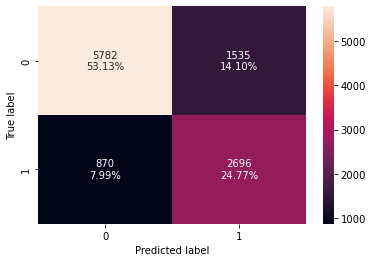

<IPython.core.display.Javascript object>

In [109]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [110]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.779013,0.756029,0.637202,0.691548


<IPython.core.display.Javascript object>

**Using model with threshold = 0.42**

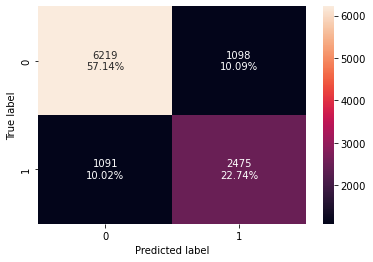

<IPython.core.display.Javascript object>

In [111]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

In [112]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.798861,0.694055,0.692695,0.693374


<IPython.core.display.Javascript object>

### Model performance summary

In [113]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.34 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.34 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.807302,0.787689,0.803600
Recall,0.632648,0.761029,0.698882
Precision,0.741268,0.650401,0.700820
F1,0.682664,0.701379,0.699850


<IPython.core.display.Javascript object>

In [114]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.34 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.34 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.804741,0.779013,0.798861
Recall,0.626192,0.756029,0.694055
Precision,0.738182,0.637202,0.692695
F1,0.677591,0.691548,0.693374


<IPython.core.display.Javascript object>

### Final Model Summary
* The model performance measures are in close alignment between the test and training data, indicating that overfitting is not an issue.
* Since minimizing loss of resources is important in this situation, the model with the highest Recall and F1 scores is considered to be the best model.
* Based on these criteria, the logistic regression with a theshold of 0.34 should be chosen, resulting in a F1 score of 0.69 and a Recall of 0.76.
* Some indicators increasing chances of cancellation in this model are lead time, number of previous cancellations, arrival, and meal type not selected.
* Some indicators decreasing chances of cancellation in this model are repeat guest, number of special requests, required parking spots, market segment Offline, and room type 7.

## Building a Decision Tree model

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  float64 
 2   type_of_meal_plan                     36275 non-null  category
 3   required_car_parking_space            36275 non-null  int64   
 4   room_type_reserved                    36275 non-null  category
 5   lead_time                             36275 non-null  int64   
 6   arrival_year                          36275 non-null  int64   
 7   arrival_month                         36275 non-null  int64   
 8   arrival_date                          36275 non-null  int64   
 9   market_segment_type                   36275 non-null  category
 10  repeated_guest                        36275 non-null  int64   
 11  no

<IPython.core.display.Javascript object>

* Since the categorical variables in this data set have no inherent order, dummy variables will be created the same as was done with the logistic regression model.
* The same data after preprocessing for the logit regression will be used for this model: the Booking_ID column has been dropped, the booking status has been converted from categorical to int, a no_of_nights column has been added in place of no_of_week_nights and no_of_weekend_nights, and a few extreme outliers have been removed.

### Split Data

In [116]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding a contstant to X variable
X = add_constant(X)

# creating dummies
X = pd.get_dummies(X)


# Splitting data in train and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)


<IPython.core.display.Javascript object>

In [117]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


<IPython.core.display.Javascript object>

In [118]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 30)
Shape of test set :  (10883, 30)
Percentage of classes in training set:
0    0.672377
1    0.327623
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.672333
1    0.327667
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

* The model evaluation criteria is the same as above with the Logit Regression model. In order to reduce loss of resources, `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives. 

#### Function used to plot confusion matrix.

In [119]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Build Decision Tree Model

* The model will be built using the DecisionTreeClassifier function. Using default 'gini' criteria. 

In [120]:
dTree = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.33, 1: 0.67}, random_state=1
)

<IPython.core.display.Javascript object>

In [121]:
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

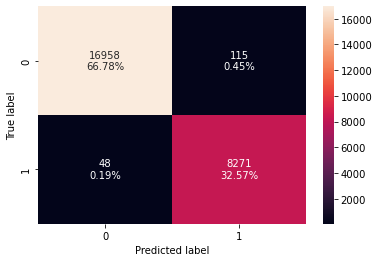

<IPython.core.display.Javascript object>

In [122]:
confusion_matrix_sklearn(dTree, X_train, y_train)

In [123]:
print("Training performance:")
model_performance_classification_statsmodels(dTree, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.993581,0.99423,0.986287,0.990242


<IPython.core.display.Javascript object>

* The Recall score on the training set is almost perfect indicating a very low proportion of false negatives - this is also seen in the confusion matrix above.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on test set

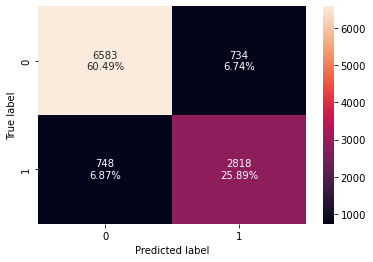

<IPython.core.display.Javascript object>

In [124]:
confusion_matrix_sklearn(dTree, X_test, y_test)

In [125]:
print("Test performance:")
model_performance_classification_statsmodels(dTree, X_test, y_test)

Test performance:


,Accuracy,Recall,Precision,F1
0,0.863824,0.790241,0.793356,0.791795


<IPython.core.display.Javascript object>

#### Training/test comparison

* The training data has a Recall Score of 0.99.
* The test data has a Recall Score of 0.79.
* When comparing the Recall scores between training and test data, it is apparent that the model is overfitting.

## Visualizing the Decision Tree

In [126]:
feature_names = list(X.columns)
print(feature_names)

['const', 'no_of_adults', 'no_of_children', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'no_of_nights', 'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


<IPython.core.display.Javascript object>

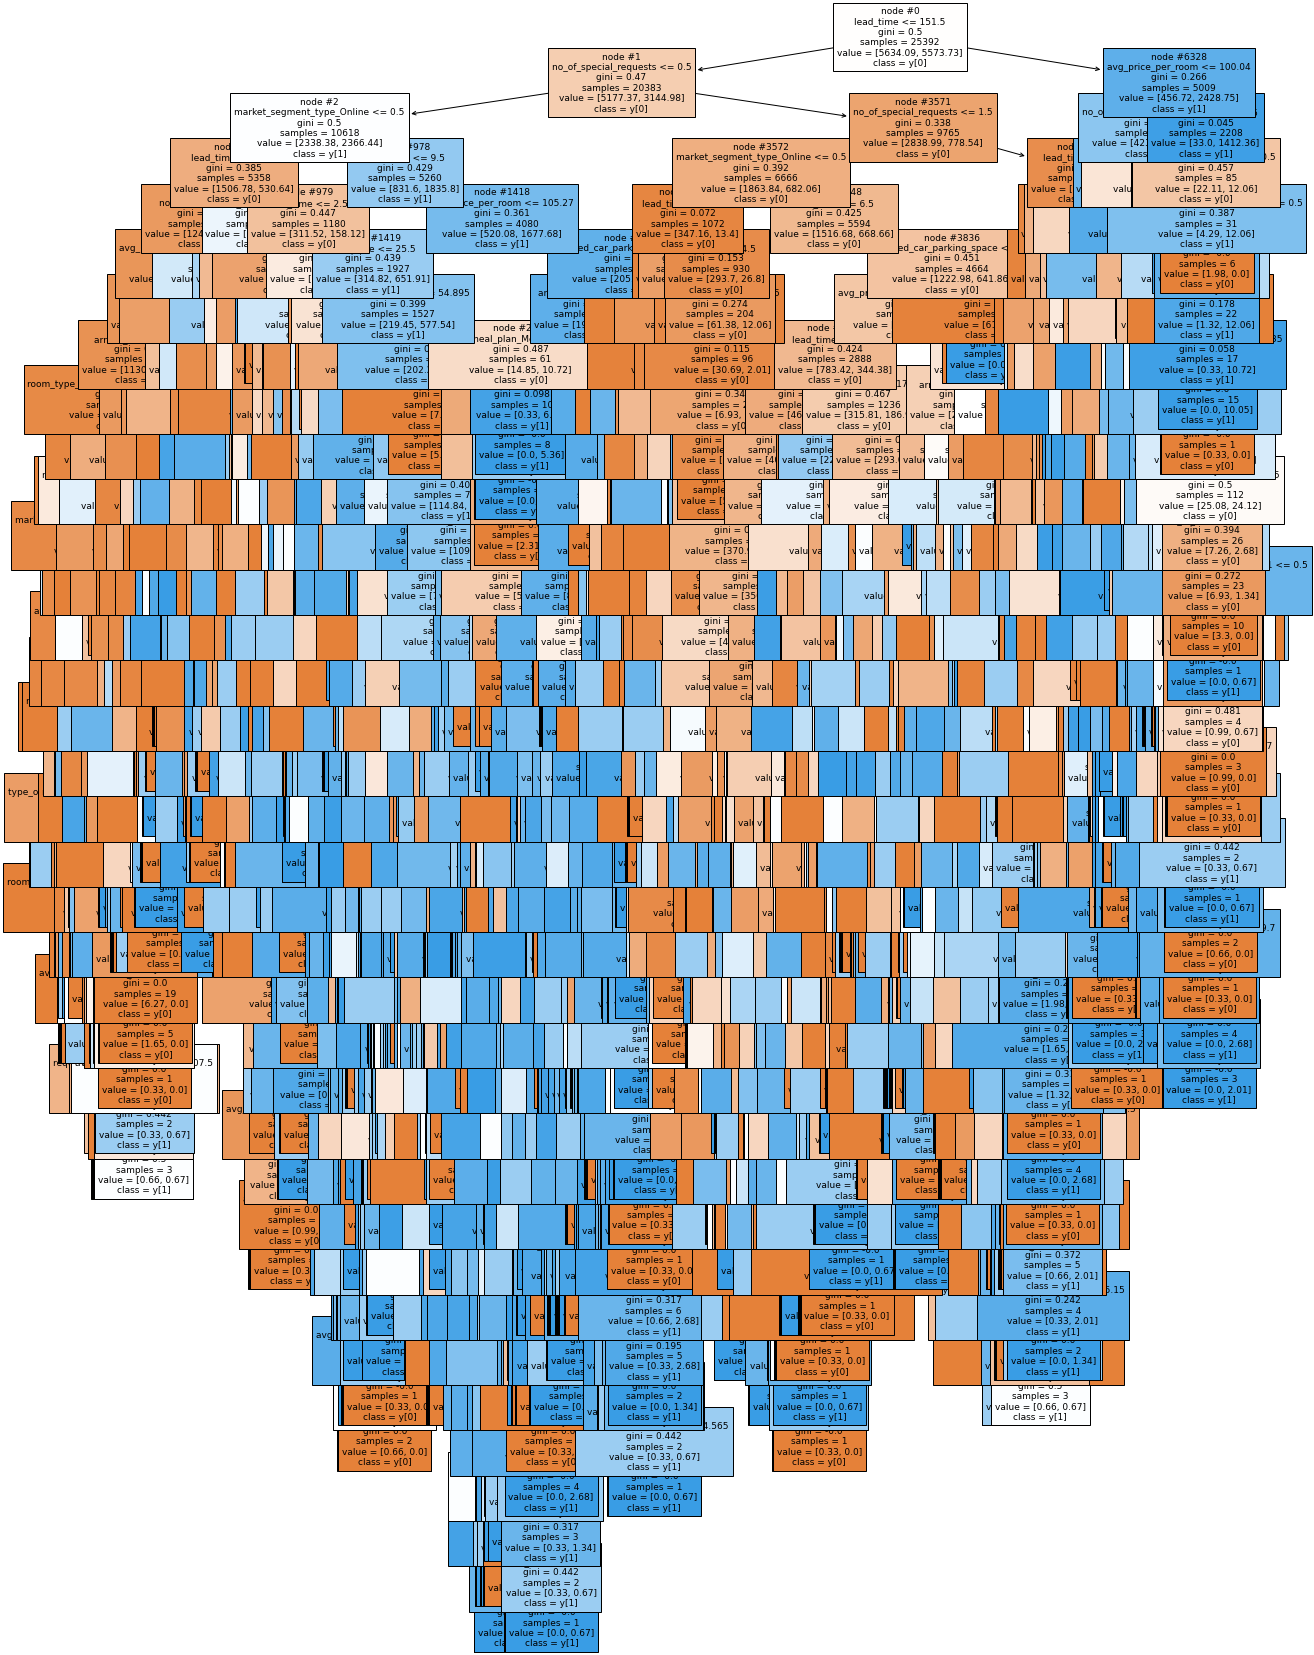

<IPython.core.display.Javascript object>

In [127]:
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [128]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_nights <= 5.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- lead_time <= 74.50
|   |   |   |   |   |   |   |--- arrival_date <= 15.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 85.55
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 65.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  65.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  85.55
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth

<IPython.core.display.Javascript object>

In [129]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                               Imp
lead_time                             3.564358e-01
avg_price_per_room                    1.533283e-01
market_segment_type_Online            9.532057e-02
no_of_special_requests                9.123951e-02
arrival_date                          8.701498e-02
arrival_month                         6.696503e-02
no_of_nights                          5.613691e-02
no_of_adults                          2.793889e-02
arrival_year                          1.749602e-02
required_car_parking_space            7.680814e-03
type_of_meal_plan_Meal Plan 1         6.666607e-03
room_type_reserved_Room_Type 4        5.591705e-03
market_segment_type_Offline           5.549123e-03
room_type_reserved_Room_Type 1        4.258505e-03
no_of_children                        4.014368e-03
type_of_meal_plan_Not Selected        3.881819e-03
type_of_meal_plan_Meal Plan 2         3.104633e-03
room_type_reserved_Room_Type 2        2.180684e-03
repeated_guest                 

<IPython.core.display.Javascript object>

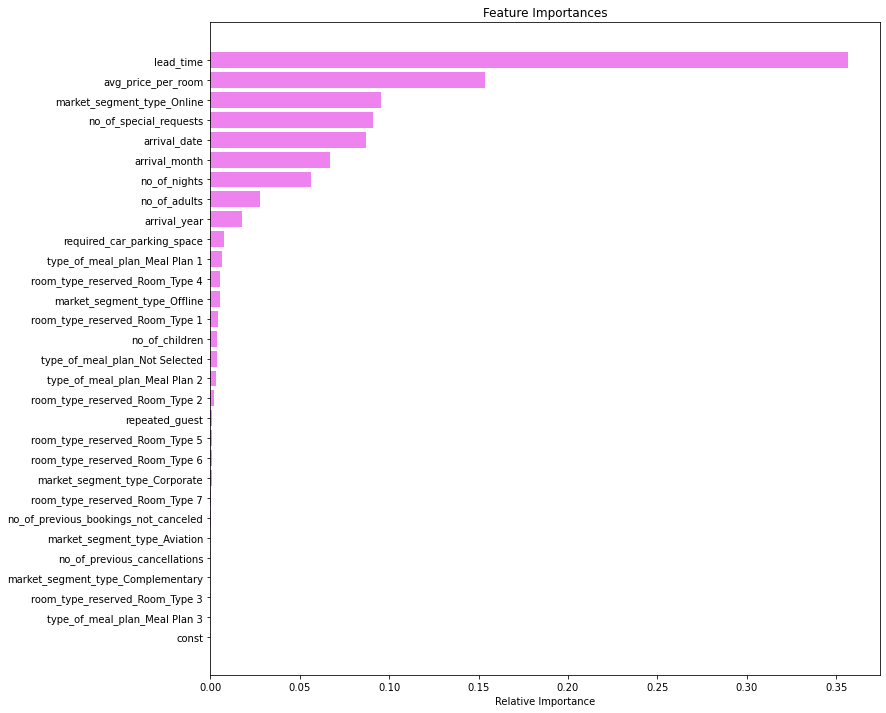

<IPython.core.display.Javascript object>

In [130]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, Lead Time is the most important variable for predicting a cancellation.

## Do we need to prune the tree?

**Yes, the tree needs to be pruned. The tree above is very complex, such a tree often overfits. The accuracy and recall values are both much higher on the training set than the test set which is another indication of overfitting.**

### Pre-Pruning Model 1 - Limiting the max depth

In [131]:
# Limiting the max depth to 3
dTree1 = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.33, 1: 0.67}, max_depth=3, random_state=1
)

<IPython.core.display.Javascript object>

In [132]:
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, max_depth=3,
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

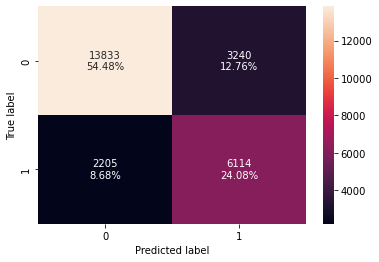

<IPython.core.display.Javascript object>

In [133]:
confusion_matrix_sklearn(dTree1, X_train, y_train)

In [134]:
print("Training performance:")
model_performance_classification_statsmodels(dTree1, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.785562,0.734944,0.653624,0.691903


<IPython.core.display.Javascript object>

#### Checking model performance on testing set

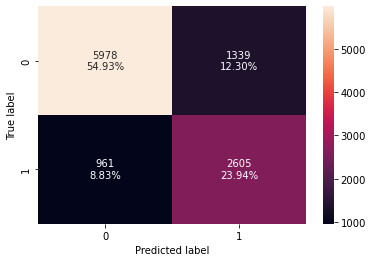

<IPython.core.display.Javascript object>

In [135]:
confusion_matrix_sklearn(dTree1, X_test, y_test)

In [136]:
print("Test performance:")
model_performance_classification_statsmodels(dTree1, X_test, y_test)

Test performance:


,Accuracy,Recall,Precision,F1
0,0.788661,0.73051,0.660497,0.693742


<IPython.core.display.Javascript object>

* The Recall Scores between the training and test data are much more similar after restricting the depth.
* Recall on training set has reduced from 0.99 to 0.73 but this is an improvement because now the model is not overfitting.

## Visualizing the Decision Tree

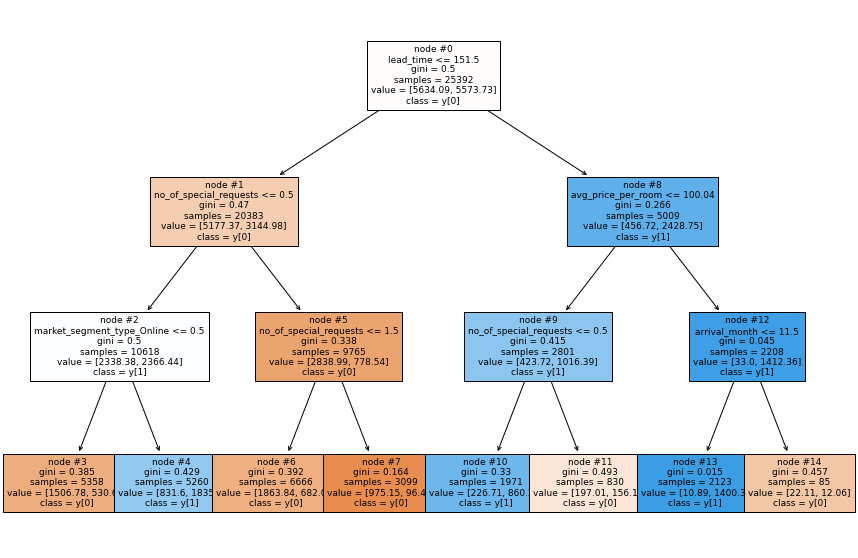

<IPython.core.display.Javascript object>

In [137]:
plt.figure(figsize=(15, 10))

tree.plot_tree(
    dTree1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [138]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [1506.78, 530.64] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [831.60, 1835.80] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- weights: [1863.84, 682.06] class: 0
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- weights: [975.15, 96.48] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- no_of_special_requests <= 0.50
|   |   |   |--- weights: [226.71, 860.28] class: 1
|   |   |--- no_of_special_requests >  0.50
|   |   |   |--- weights: [197.01, 156.11] class: 0
|   |--- avg_price_per_room >  100.04
|   |   |--- arrival_month <= 11.50
|   |   |   |--- weights: [10.89, 1400.30] class: 1
|   |   |--- arrival_month >  11.50
|   |   |   |--- weights: [22.11, 12.06] class: 0



<IPython.core.display.Javascript object>

In [139]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dTree1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.477735
no_of_special_requests                0.233970
market_segment_type_Online            0.219093
avg_price_per_room                    0.055069
arrival_month                         0.014134
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 2        0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
type_of_meal_plan_Not Selected        0.000000
market_segment_type_Aviation          0.000000
market_segment_type_Complementary     0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Offline           0.000000
room_type_reserved_Room_Type 1        0.000000
const                                 0.000000
type_of_meal_plan_Meal Plan 3         0.000000
no_of_adults                          0.000000
type_of_meal_

<IPython.core.display.Javascript object>

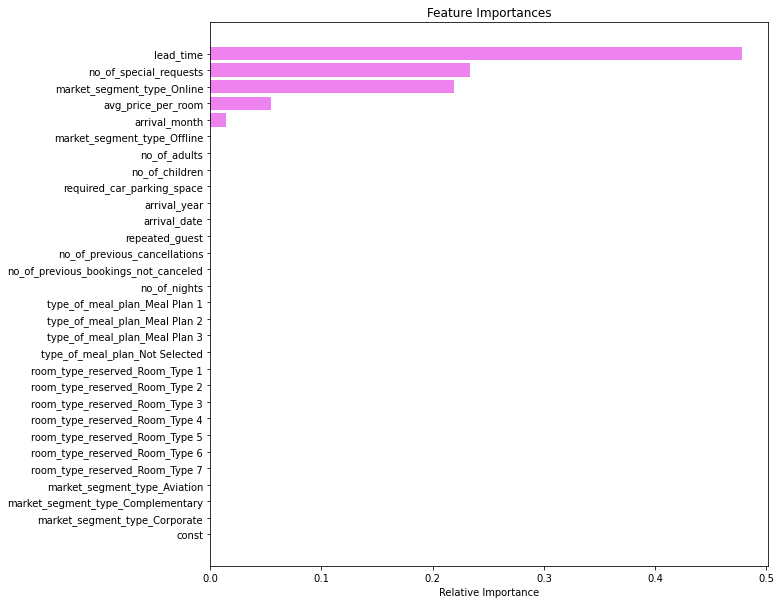

<IPython.core.display.Javascript object>

In [140]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The number of features of importance has reduced to 5 features in this model.
* Lead Time is still the most important model feature.
* Although avg_price_per_room is still a feature of importance, it has dropped in degree of importance.
* The number of special requests has moved up to the second most important feature followed closely by the Online market segment. 

### Pre-Pruning Model 2 - Using GridSearch for Hyperparameter Tuning 

In [141]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.33, 1: 0.67})

# Grid of parameters to choose from
## add from article
parameters = {
    "max_depth": np.arange(1, 10),
    "min_samples_leaf": [1, 2, 5, 7, 10, 15, 20],
    "max_leaf_nodes": [2, 3, 5, 10],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, max_depth=2,
                       max_leaf_nodes=3, min_impurity_decrease=0.001,
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

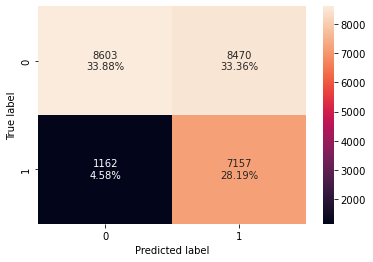

<IPython.core.display.Javascript object>

In [142]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [143]:
print("Training performance:")
model_performance_classification_statsmodels(estimator, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.620668,0.86032,0.457989,0.597762


<IPython.core.display.Javascript object>

#### Checking model performance on test set

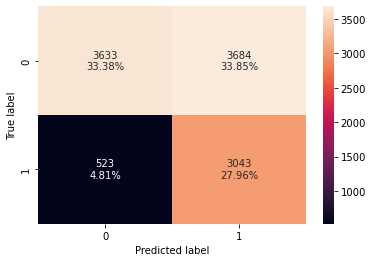

<IPython.core.display.Javascript object>

In [144]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [145]:
print("Test performance:")
model_performance_classification_statsmodels(estimator, X_test, y_test)

Test performance:


,Accuracy,Recall,Precision,F1
0,0.613434,0.853337,0.452356,0.591276


<IPython.core.display.Javascript object>

* After tuning hyperparameters, there is a good match in Recall Score between the training and test data.
* The Recall Scores of 0.86 (train) and 0.85 (test) show that this model is a good model for reducing false negatives.

## Visualizing the Decision Tree

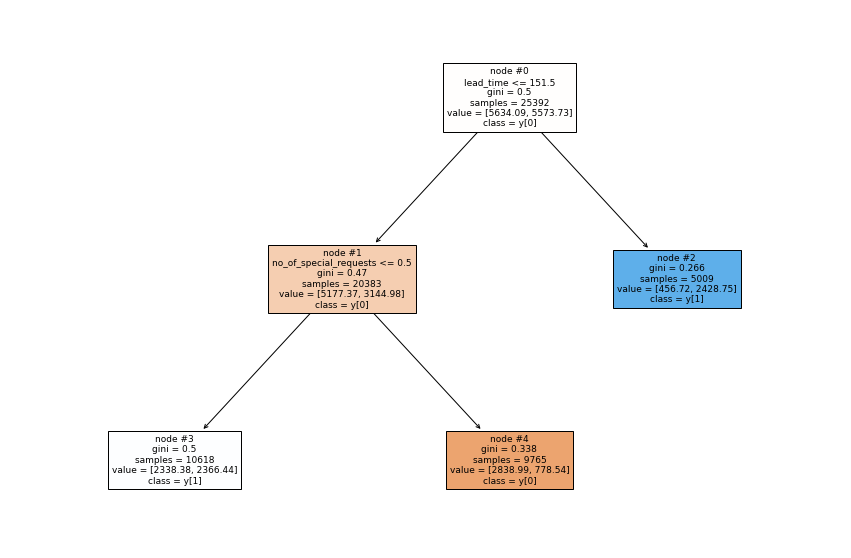

<IPython.core.display.Javascript object>

In [146]:
plt.figure(figsize=(15, 10))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [147]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [2338.38, 2366.44] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [2838.99, 778.54] class: 0
|--- lead_time >  151.50
|   |--- weights: [456.72, 2428.75] class: 1



<IPython.core.display.Javascript object>

In [148]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                           Imp
lead_time                             0.731308
no_of_special_requests                0.268692
const                                 0.000000
type_of_meal_plan_Meal Plan 3         0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
market_segment_type_Aviation          0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Room_Type 2        0.000000
room_type_reserved_Room_Type 1        0.000000
type_of_meal_plan_Not Selected        0.000000
type_of_meal_plan_Meal Plan 2         0.000000
no_of_adults                          0.000000
type_of_meal_plan_Meal Plan 1         0.000000
no_of_nights                          0.000000
avg_price_per

<IPython.core.display.Javascript object>

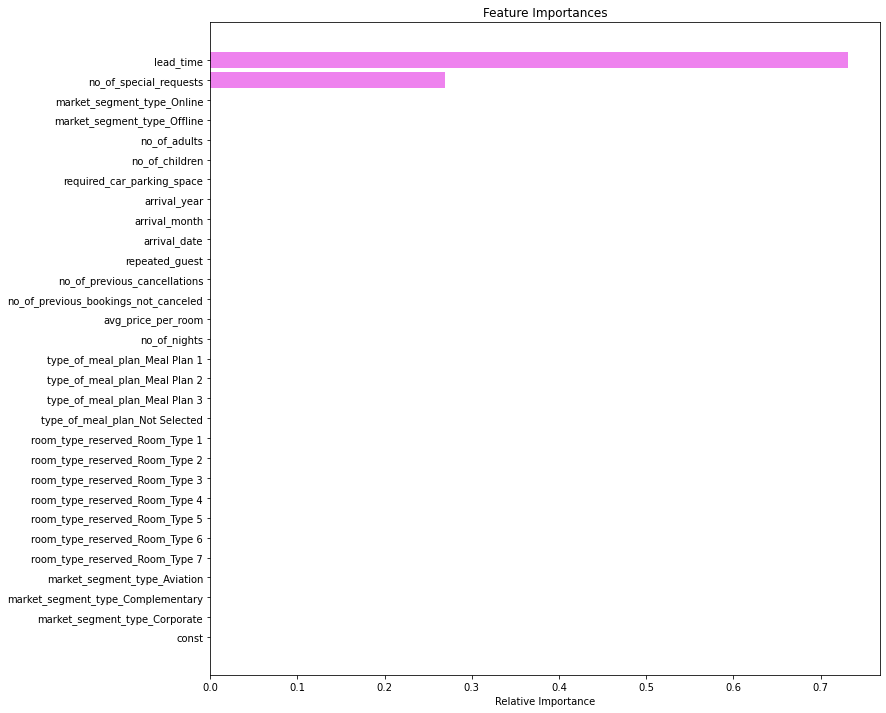

<IPython.core.display.Javascript object>

In [149]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* There are now only 2 important features remaining.
* It is possible that this model is too simple.
* A second Hyperparameter Tuning model will be created with different parameters.

### Pre-Pruning Model 3 - Using GridSearch for Hyperparameter Tuning (different parameters)

In [150]:
# Choose the type of classifier.
estimator2 = DecisionTreeClassifier(random_state=1, class_weight={0: 0.33, 1: 0.67})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator2, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator2 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, max_depth=2,
                       max_leaf_nodes=3, min_impurity_decrease=0.001,
                       random_state=1)

<IPython.core.display.Javascript object>

In [151]:
print("Training performance:")
model_performance_classification_statsmodels(estimator2, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.692383,0.873542,0.518109,0.650436


<IPython.core.display.Javascript object>

In [152]:
print("Test performance:")
model_performance_classification_statsmodels(estimator2, X_test, y_test)

Test performance:


,Accuracy,Recall,Precision,F1
0,0.690343,0.870163,0.516306,0.648079


<IPython.core.display.Javascript object>

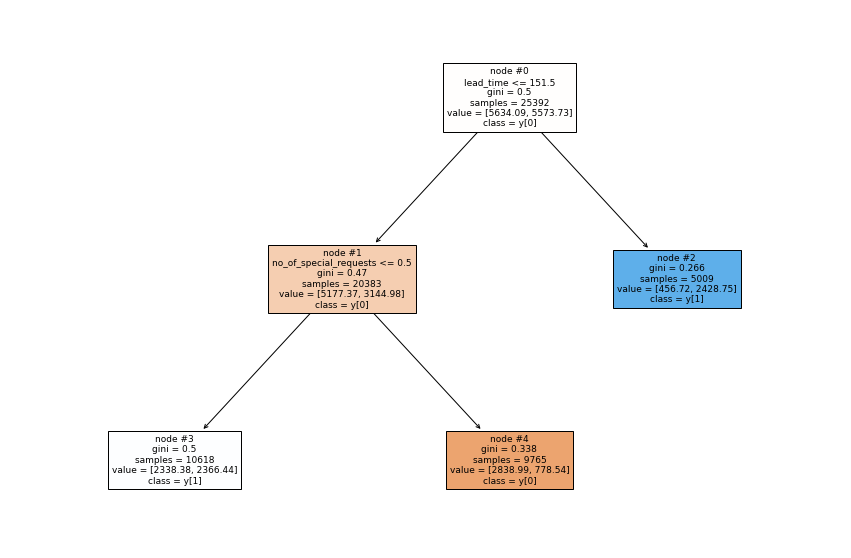

<IPython.core.display.Javascript object>

In [153]:
plt.figure(figsize=(15, 10))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

* The Recall Scores slightly improved for both training and test. 
* The model complexity did not change.

## Post-Pruning - Cost Complexity Pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [154]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.33, 1: 0.67})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [155]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.008330
1,0.000000e+00,0.008330
2,1.634455e-20,0.008330
3,1.634455e-20,0.008330
4,1.634455e-20,0.008330
...,...,...
1841,9.352859e-03,0.327738
1842,9.481354e-03,0.337219
1843,1.257077e-02,0.349790
1844,3.397133e-02,0.417732


<IPython.core.display.Javascript object>

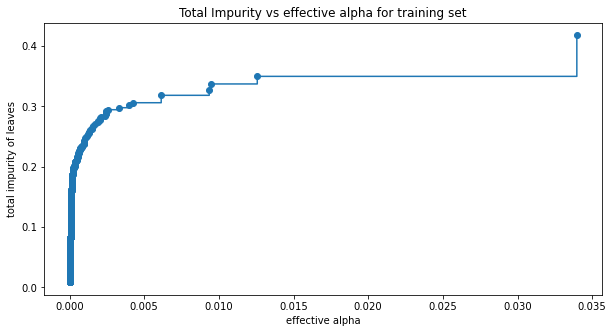

<IPython.core.display.Javascript object>

In [156]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [157]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.33, 1: 0.67}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08225309170708406


<IPython.core.display.Javascript object>

For the remainder, the last element in
``clfs`` and ``ccp_alphas``is removed, because it is the trivial tree with only one
node. It can be seen below that that the number of nodes and tree depth decreases as alpha
increases.

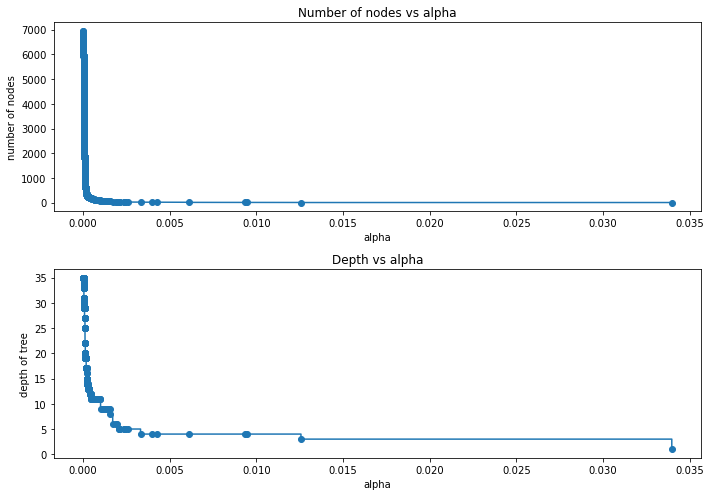

<IPython.core.display.Javascript object>

In [158]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Accuracy vs alpha for training and testing sets
----------------------------------------------------
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits, leading to
a 100% training accuracy and comparatively low testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

In [159]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

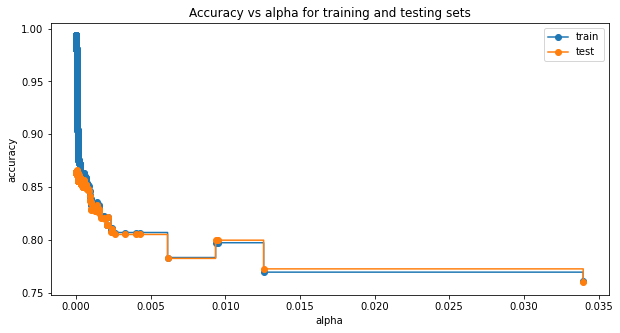

<IPython.core.display.Javascript object>

In [160]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [161]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print("Training accuracy of best model: ", best_model.score(X_train, y_train))
print("Test accuracy of best model: ", best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=4.433100572495761e-05,
                       class_weight={0: 0.33, 1: 0.67}, random_state=1)
Training accuracy of best model:  0.9712901701323251
Test accuracy of best model:  0.8656620417164385


<IPython.core.display.Javascript object>

* At this very small value of ccp_alpha, the model is overfitting the training data.

#### Since accuracy isn't the right metric for this data, looking at recall below.

In [162]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [163]:
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

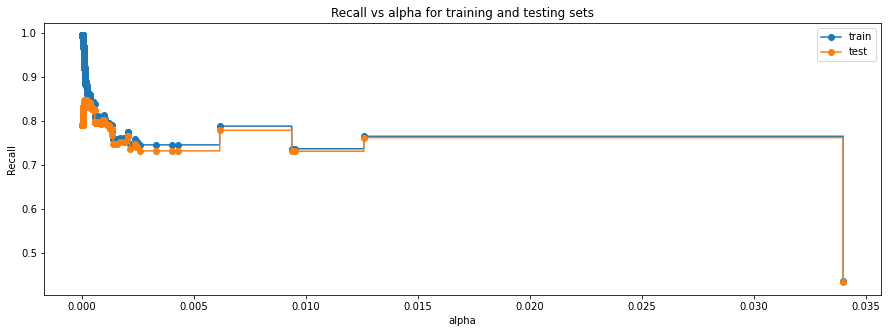

<IPython.core.display.Javascript object>

In [164]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [165]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001240375434779961,
                       class_weight={0: 0.33, 1: 0.67}, random_state=1)


<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [166]:
print("Training performance:")
model_performance_classification_statsmodels(best_model, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.892407,0.906239,0.794331,0.846603


<IPython.core.display.Javascript object>

#### Checking model performance on test set

In [167]:
print("Test performance:")
model_performance_classification_statsmodels(best_model, X_test, y_test)

Test performance:


,Accuracy,Recall,Precision,F1
0,0.855463,0.84857,0.745504,0.793705


<IPython.core.display.Javascript object>

* At the point where recall for the test set is maximized, recall is higher for the training set, indicating that the model is overfitting with post processing ccp_alpha=0.00012.
* The model is too complex at this at this small alpha, as it is getting close to alpha = 0 with a maximum number of nodes.
* At alpha = 0.013, the Recall Scores for the model on test and train data are very close, but the tree only has 2 nodes.
* At alpha = 0.006, the Recall Scores improve and the model is not overly simple, but the train and test Recall scores don't match as closesly as they do at alpha = 0.013.
* The model with ccp_alpha close to 0.006 (5th point from the right) will be examined further.

In [168]:
# Find index of shallowest tree depth on recall_test plot
print(np.argmin(recall_test))

1844


<IPython.core.display.Javascript object>

In [169]:
# alpha and recall at 5th least complex point on recall_test plot
print(clfs[1840])
best_model2 = clfs[1840]

DecisionTreeClassifier(ccp_alpha=0.006137095018529302,
                       class_weight={0: 0.33, 1: 0.67}, random_state=1)


<IPython.core.display.Javascript object>

#### Checking model performance on training set

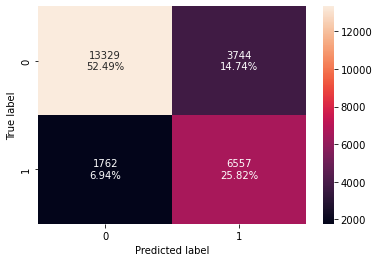

<IPython.core.display.Javascript object>

In [170]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [171]:
print("Training performance:")
model_performance_classification_statsmodels(best_model2, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.78316,0.788196,0.63654,0.704296


<IPython.core.display.Javascript object>

#### Checking model performance on test set

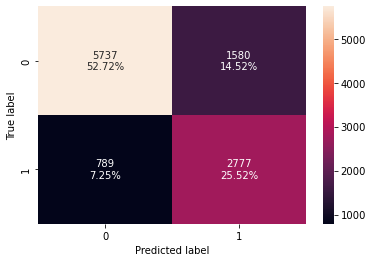

<IPython.core.display.Javascript object>

In [172]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [173]:
print("Test performance:")
model_performance_classification_statsmodels(best_model2, X_test, y_test)

Test performance:


,Accuracy,Recall,Precision,F1
0,0.782321,0.778744,0.637365,0.700997


<IPython.core.display.Javascript object>

## Visualizing the Decision Tree

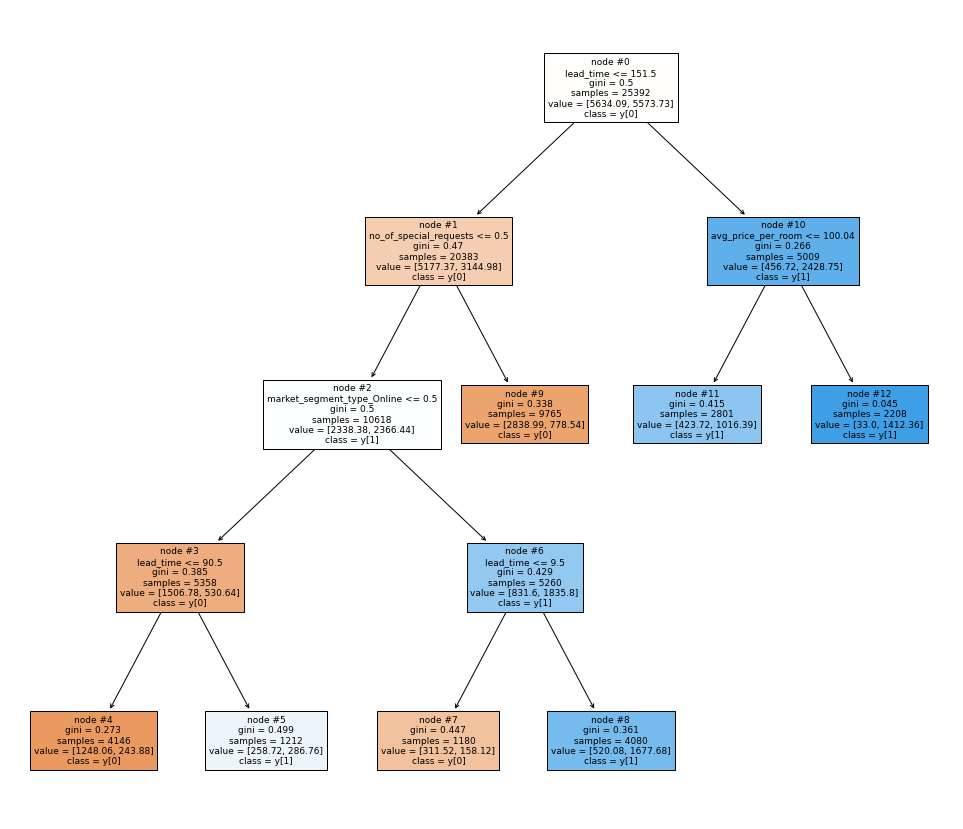

<IPython.core.display.Javascript object>

In [174]:
plt.figure(figsize=(17, 15))

tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [175]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- weights: [1248.06, 243.88] class: 0
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- weights: [258.72, 286.76] class: 1
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time <= 9.50
|   |   |   |   |--- weights: [311.52, 158.12] class: 0
|   |   |   |--- lead_time >  9.50
|   |   |   |   |--- weights: [520.08, 1677.68] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [2838.99, 778.54] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [423.72, 1016.39] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [33.00, 1412.36] class: 1



<IPython.core.display.Javascript object>

In [176]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.573658
market_segment_type_Online            0.207719
no_of_special_requests                0.166413
avg_price_per_room                    0.052210
type_of_meal_plan_Not Selected        0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
market_segment_type_Aviation          0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Room_Type 2        0.000000
room_type_reserved_Room_Type 1        0.000000
const                                 0.000000
type_of_meal_plan_Meal Plan 3         0.000000
no_of_adults                          0.000000
type_of_meal_plan_Meal Plan 1         0.000000
no_of_nights 

<IPython.core.display.Javascript object>

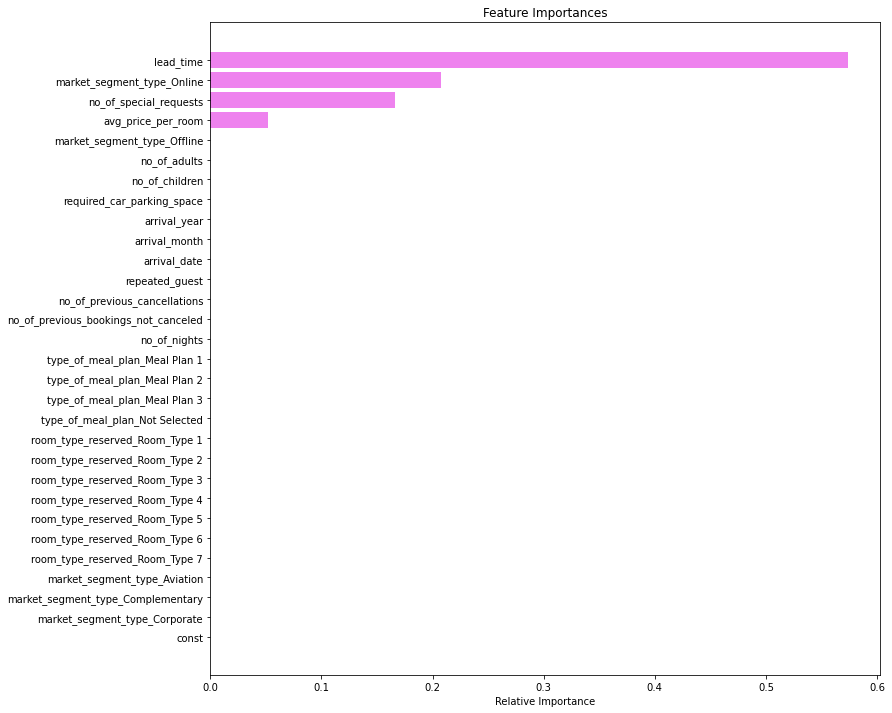

<IPython.core.display.Javascript object>

In [177]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead time is identified as the feature of greatest importance for predicting cancellations.
* Market_segment_Online, no_of_special_requests, and avg_price_per_room are also important features in this model.

## Comparing all the decision tree models

In [178]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Initial decision tree model",
            "Decision tree with restricted maximum depth",
            "Decision tree with hyperparameter tuning",
            "Decision tree with hp tuning (diff parameters)",
            "Decision tree with post-pruning",
        ],
        "Train_Recall": [0.99, 0.73, 0.86, 0.87, 0.79],
        "Test_Recall": [0.79, 0.73, 0.85, 0.87, 0.78],
    }
)
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,0.99,0.79
1,Decision tree with restricted maximum depth,0.73,0.73
2,Decision tree with hyperparameter tuning,0.86,0.85
3,Decision tree with hp tuning (diff parameters),0.87,0.87
4,Decision tree with post-pruning,0.79,0.78


<IPython.core.display.Javascript object>

## Model Performance Comparison and Conclusions

#### Decision Tree
* Restricting the max depth of the decision tree lead to a model that was not overfit with reasonable train and test Recall scores of 73%.
* Hyperparameter tuning with class weighting resulted in good train and test Recall Scores of 85-86%, but the model was overly simplified.
* Running the Hyperparameter tuning with different initial parameters resulted in a model with slightly better Recall Scores 87%, but the model was still over simplified.
* The Decision tree model that resulted from post-pruning was the best model. The train and test recall scores were closely matching, and still fairly high at 78-79%, with a model that was not overly simplified or overly complex.
* Additionally a good balance of precision and recall scores was achived for train and test data with post-pruning Decision tree model as the f1 score was 70%.

#### Logistic Regression
* The Logit Regression model with a threshold of 0.34 resulted in the best train and test recall scores of about 76%. 
* The best decision tree model was much simpler than the Regression Tree model, with only 4 features of importance vs. 17 predictor variables in the Logit Regression model.
* Below a Logit Regression model is produced using only the 4 important features from the Decision Tree model.

### Logistic Regression Model Revisited using only Important Features from Best Decision Tree Model

In [179]:
selected_features = [
    "lead_time",
    "avg_price_per_room",
    "market_segment_type",
    "no_of_special_requests",
]
X = df[selected_features]
Y = df["booking_status"]

# adding a contstant to X variable
X = add_constant(X)

# creating dummies
X = pd.get_dummies(X, drop_first=True)

<IPython.core.display.Javascript object>

In [180]:
X.columns

Index(['const', 'lead_time', 'avg_price_per_room', 'no_of_special_requests',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

<IPython.core.display.Javascript object>

In [181]:
X = X.drop(
    [
        "market_segment_type_Complementary",
        "market_segment_type_Corporate",
        "market_segment_type_Offline",
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [182]:
# Splitting data in train and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [183]:
X.head()

,const,lead_time,avg_price_per_room,no_of_special_requests,market_segment_type_Online
0,1.0,224,65.00,0,0
1,1.0,5,106.68,1,1
2,1.0,1,60.00,0,1
3,1.0,211,100.00,0,1
4,1.0,48,94.50,0,1


<IPython.core.display.Javascript object>

In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [185]:
checking_vif(X_train)

,feature,VIF
0,const,11.436952
1,lead_time,1.028200
2,avg_price_per_room,1.132587
3,no_of_special_requests,1.174001
4,market_segment_type_Online,1.291554


<IPython.core.display.Javascript object>

In [186]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25387
Method:                           MLE   Df Model:                            4
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.3111
Time:                        23:47:13   Log-Likelihood:                -11064.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -4.1073      0.071    -57.960      0.000      -4.246      -3.968
lead_time                      0.0154      0.000     65.964      0.000       0.015 

<IPython.core.display.Javascript object>

In [187]:
# converting coefficients to odds
odds = np.exp(lg.params)

# finding the percentage change
perc_change_odds = (np.exp(lg.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,const,lead_time,avg_price_per_room,no_of_special_requests,market_segment_type_Online
Odds,0.016452,1.015518,1.014848,0.223413,5.747964
Change_odd%,-98.354752,1.551796,1.484752,-77.658736,474.796433


<IPython.core.display.Javascript object>

### Coefficient interpretations
* `lead_time`: Holding all other features constant a 1 unit change in lead_time will increase the odds of a cancellation by 1.02 times or a 1.55% increase in odds of a canceled booking.
* `avg_price_per_room`: Holding all other features constant a 1 unit change in avg_price_per_room will increase the odds of a cancellation by 1.01 times or a 1.49% increase in odds of a canceled booking.
* `no_of_special_requests`: Holding all other features constant a 1 unit change in the number of special requests will decrease the odds of a cancellation by 0.22 times or a 77.6% decrease in odds of a canceled booking.
* `market_segment_type_Online`: Holding all other features constant, if the market segment type is Online, it will increase the odds of a cancellation by 5.75 times or a 475% increase in odds of a canceled booking.

#### Checking model performance on the training set

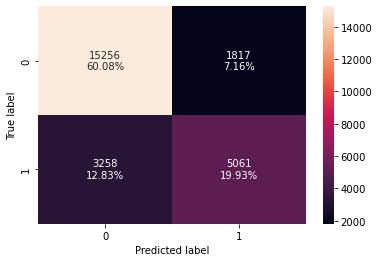

<IPython.core.display.Javascript object>

In [188]:
# creating confusion matrix - default threshold (0.5)
confusion_matrix_statsmodels(lg, X_train, y_train)

In [189]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.800134,0.608366,0.735824,0.666053


<IPython.core.display.Javascript object>

#### ROC-AUC

* ROC-AUC on training set

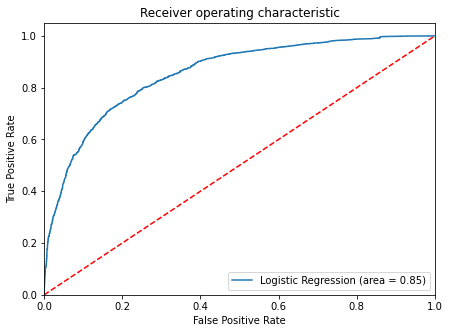

<IPython.core.display.Javascript object>

In [190]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Model Performance Improvement

#### Optimal threshold using AUC-ROC curve

In [191]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.382595937633257


<IPython.core.display.Javascript object>

#### Checking model performance on training set

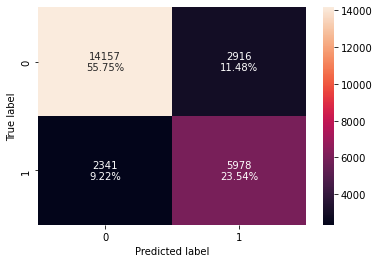

<IPython.core.display.Javascript object>

In [192]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, X_train, y_train, threshold=optimal_threshold_auc_roc)

In [193]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.792966,0.718596,0.672139,0.694591


<IPython.core.display.Javascript object>

* At the threshold of 0.38, we get balanced recall and precision.

#### Using Precision-Recall curve to try to find a better threshold

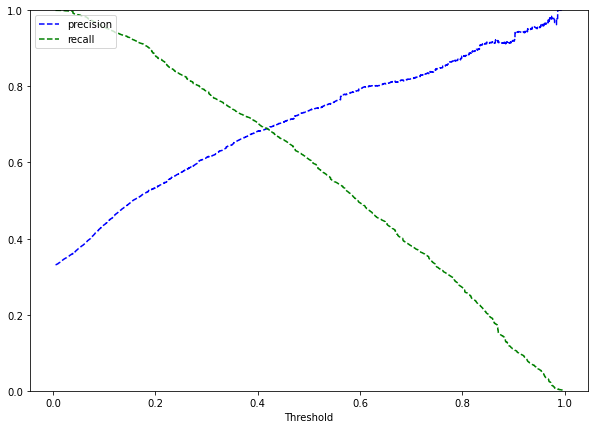

<IPython.core.display.Javascript object>

In [194]:
y_scores = lg.predict(X_train)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [195]:
# setting the threshold
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

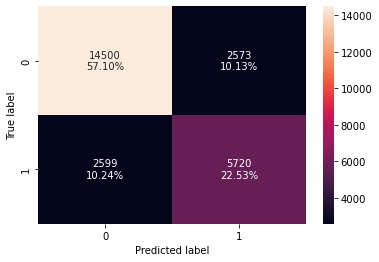

<IPython.core.display.Javascript object>

In [196]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, X_train, y_train, threshold=optimal_threshold_curve)

In [197]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.796314,0.687583,0.689738,0.688659


<IPython.core.display.Javascript object>

* At the threshold of 0.42, we get balanced recall and precision.
* Both Recall and F1 were slightly higher with a threshold of 0.38.

In [198]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.38 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.38 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.807302,0.792966,0.796314
Recall,0.632648,0.718596,0.687583
Precision,0.741268,0.672139,0.689738
F1,0.682664,0.694591,0.688659


<IPython.core.display.Javascript object>

### Checking Performance on the Test Set

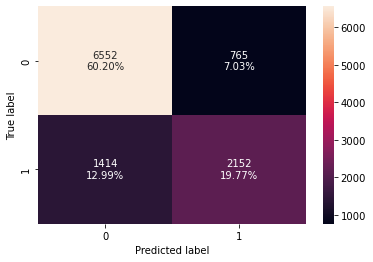

<IPython.core.display.Javascript object>

In [199]:
# creating confusion matrix - default threshold (0.5)
confusion_matrix_statsmodels(lg, X_test, y_test)

In [200]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg, X_test, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.799779,0.603477,0.737744,0.66389


<IPython.core.display.Javascript object>

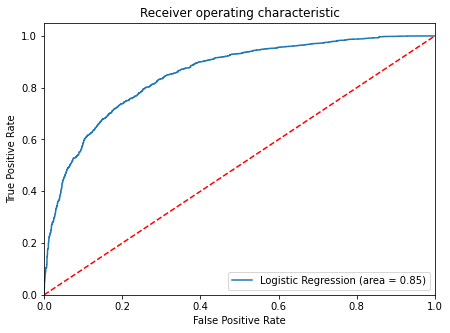

<IPython.core.display.Javascript object>

In [201]:
logit_roc_auc_train = roc_auc_score(y_test, lg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lg.predict(X_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Using threshold = 0.38

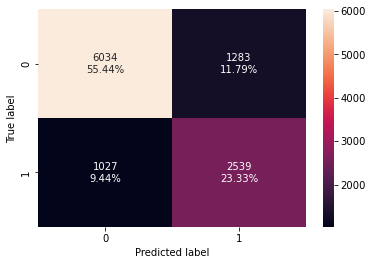

<IPython.core.display.Javascript object>

In [202]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, X_test, y_test, threshold=optimal_threshold_auc_roc)

In [203]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.787742,0.712002,0.664312,0.687331


<IPython.core.display.Javascript object>

### Using threshold = 0.42

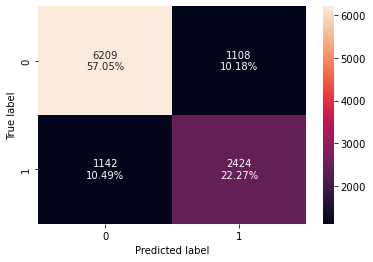

<IPython.core.display.Javascript object>

In [204]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, X_test, y_test, threshold=optimal_threshold_curve)

In [205]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.793256,0.679753,0.686297,0.683009


<IPython.core.display.Javascript object>

In [206]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.38 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.38 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.807302,0.792966,0.796314
Recall,0.632648,0.718596,0.687583
Precision,0.741268,0.672139,0.689738
F1,0.682664,0.694591,0.688659


<IPython.core.display.Javascript object>

In [207]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.38 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.38 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.799779,0.787742,0.793256
Recall,0.603477,0.712002,0.679753
Precision,0.737744,0.664312,0.686297
F1,0.663890,0.687331,0.683009


<IPython.core.display.Javascript object>

#### Logistic Regression Model using Decision Tree Predictor Variables
* The Logistic Regression Model was simplified by keeping only 4 predictor variables.
* The performance metric scores decreased a little bit from the more complex model (17 independent variables) to the simple model (4 independent variables), but the simple model is much easier to interpret.
* The simplified model performed best with a threshold value of 0.38 and the more complex logit regression performed best with a threshold of 0.34.
* For both models, the target and test values had similar performance metric scoring, indicating overfitting was not an issue.
* The simplified logistic regression model had a slight drop in Recall Scores 71-72% score as compared to the original logistic regression model with Recall Scores of train and test at about 76%. But the model did significantly reduce the number of predictor variables.

## Actionable Insights and Recommendations

### Model Comparison
#### Logistic Regression
* The logistic regression model with a threshold = 0.34, gave the highest Recall Scores for train and test of 76%.
* Since train and test scores were in good agreement, this was not an overfit model.
* The complexity of this model could be considered an issue, given that is retained 17 predictor variables.
* A much simpler logistic regression model was produced by starting with only the 4 predictor variables of importance from the best decision tree model.
* The simpler logit regression model performed best with a threshold = 0.38, giving Recall scores of 71-72%.
* These models also displayed a reasonable balance of precision and recall with F1 scores of 69-70%.

#### Decision Tree
* The Decision Tree model resulting from post-pruning had the best balance of complexity (not over simplified and not over fit) while mainting high Recall Scores of 78-79%.
* The same model also resulted in F1 scores of 70% for training and test sets.
* This model resulted in four predictor variables of importance: lead_time, market_segment_type_Online, no_of_special_requests, and avg_price_per_room.

* The Decision Tree model resulting from post-pruning was the best model overall based on the high Recall and F1 scores, agreement between training and test performance metrics, while maintaing more decision data than the decision tree models that resulted from hyperparameter tuning.

#### Insights, Recommendations, Key Takeaways 
* For future model building, a customer ID would be useful for identifying when multiple rooms are booked by a single party. For example, rooms with 0 adults most likely have a room booked next door for parents of the same family.
* Lead time was a strong predictor of cancellations. As the lead time increases, the greater the likelihood of a cancellation. In order to mitigate this issue, perhaps the hotel should make it part of their policy to require a commitment to the booking 3-5 days in advance of the stay. If the booking parties cannot be contacted for confirmation, the hotel could cancel the booking themselves. If the booking is canceled, it would give the hotel a few days to rebook the room. If parties did confirm, it would be effectively resetting the lead time to a period of no greater than 5 days.
* The hotel could charge a no-show fee and/or fee for cancellations made less than 12 hours in advance.
* Bookings with a greater number of special requests had a lower odds of cancellation. The hotel could offer more special services and/or encourage customers to make special requests while booking by adding features to their website showing allowing guests to be aware that special requests can easily be made at the time of booking.
* Average price per room was another important feature. Higher priced bookings get more cancellations. The hotel may want to analyze their pricing strategy to make sure that they are keeping competitive seasonal pricing with the nearby hotels that offer similar accomodations.
* Online market segment has the most cancellations, in order to minimize the number of cancellations, a small percentage of the price could be required for this market segment at the time of booking.
* In general, the hotel has a large portion of 1st time guests. A larger fraction of first time guests cancel than repeating guests. The hotel may want to focus on hospitality and/or ammenity improvements in order to improve perceived value and maintain repeat customers.